# AIT Development notebook

## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|1|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit|
| 4|import|1|you should write use import modules.<br>but bottom lines do not edit.|should edit|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

In [ ]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from glob import glob
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.1 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [3]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()
    requirements_generator.add_package('pandas','2.2.3')
    requirements_generator.add_package('seaborn','0.13.0')
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.24-py3-none-any.whl (from -r /workdir/root/develop/requirements.txt (line 3))
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
ait-sdk is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for psutil: filename=psutil-5.7.3-cp39-cp39-linux_x86_64.whl size=272711 sha256=49ffe8559d7f17652b94c36f222aed0ae078d3b3ba5104262c6315d803cf0c6b
  Stored in directory: /root/.cache/pip/wheels/76/43/53/a0fed7ed0582fd7b0b3032a6703bd498bc6397d4217e88a9ce
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-py3-none-any.whl size=20065 sha256=a05ce163cc56775585e0f54eadb7a01aa79ea11ed0dd7486af3af4e7406307fc
  Stored in directory: /root/.cache/pip/wheels/7f/2c/24/85d73581e5927be15689598ed1f02f

In [4]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pathlib import Path
from os import makedirs, path
import itertools
import math
# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [5]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_ca_distribution')
    manifest_genenerator.set_ait_description('表データの属性の組み合わせで属性値のカウントや出現割合を算出する\nこのサマリ情報を元に、表データの出現頻度の分布傾向を推察することができる')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_alyz_dataset_table_counts_comb_all_attr')
    manifest_genenerator.set_ait_version('1.0')
    manifest_genenerator.add_ait_keywords('BDD100K')
    manifest_genenerator.add_ait_keywords('recode count')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/B-2データセットの均一性')
    inventory_requirement_Data = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])
    manifest_genenerator.add_ait_inventories(name='Data',
                                             type_='dataset',
                                             description='表データ(csv)\n1列目は属性名、全属性がカテゴリ属性',
                                             requirement=inventory_requirement_Data)
    manifest_genenerator.add_ait_parameters(name='attribute_no',
                                            type_='int',
                                            description='表データの分析対象属性数\n左から何列分を分析対象とするか',
                                            default_val='6',
                                            min_value='2')
    manifest_genenerator.add_ait_parameters(name='dimension',
                                            type_='int',
                                            description='分析する属性の組み合わせ数\n※3を指定した場合、3つの属性の組み合わせを生成し、それぞれ分析する',
                                            default_val='2',
                                            min_value='2')
    manifest_genenerator.add_ait_resources(name='distibution_csv',
                                           type_='table',
                                           description='組み合わせごとの分布表')
    manifest_genenerator.add_ait_resources(name='distibution_plot',
                                           type_='picture',
                                           description='各組み合わせの分布図')
    manifest_genenerator.add_ait_downloads(name='Log',
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

In [6]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories('Data','BDD_data/BDD_labels_2036.csv')
    input_generator.set_ait_params('attribute_no','7')
    input_generator.set_ait_params('dimension','2')
    input_generator.write()

In [7]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [8]:
#########################################
# area:functions
# should edit
#########################################

BOLD = '\033[1m'
END = '\033[0m'


@log(logger)
def condition_check(data,n,r):
    att_list = list(data.columns.values[1:-1])
    if n> len(att_list):
        print('ERROR: Total number of available attribute is less than total number of given attribute')
        sys.exit() 
    if n<1:
        print('ERROR: No attributes to choose from.')
        sys.exit()
    if r<1:
        print('ERROR: Dimension must be greater than 0')
        sys.exit()
    if n<r:
        print('ERROR: Number of total attributes can not be less than given dimenion.')
        sys.exit()

@log(logger)
@resources(ait_output, path_helper, 'distibution_csv')
def save_distibution_csv(result_df, file_name, file_path: str=None):
    file_name = file_name.replace(' ', '')
    file_path = file_path + file_name +'.csv'
    result_df.to_csv(file_path, index = False)
    return file_path

@log(logger)
@resources(ait_output, path_helper, 'distibution_plot')
def save_distibution_plot(result_df, att_name, file_path: str=None, is_single: bool=False):
    file_name = att_name.replace(' ', '')
    
    if len(result_df)<60: font_size = 14
    if len(result_df)>60: font_size = 8
    fig = plt.figure(dpi=100, figsize=(25,6))
    if is_single:
        x_name='Attribute values'
    else:
        x_name='Combination name'
    result_df.plot(x = x_name, y = 'Percentage', kind = 'bar', fontsize = font_size, figsize = (25,6))
    plt.yscale('log')
    plt.xlabel(att_name)
    plt.ylabel('Distribution of data in combination')
    for index,_data in enumerate(list(result_df['Percentage'].values)): 
        if _data>1:_data=1
        if _data<0.001: continue
        plt.annotate( str(_data),(index , _data*1.1), va = 'bottom' ,ha = 'center', rotation = 90)
    file_path = file_path +  file_name +'.jpg'
    plt.savefig(file_path, bbox_inches="tight")
    return file_path

@log(logger)
def calc_dist_single(data,n):
    att_list = list(data.columns.values[1:-1])
    att_list = att_list[0:n]
    for col_name in att_list:
        count_dict= dict(round(data[col_name].value_counts()/ int(data[col_name].count()),4))
        attr_data= {'Attribute values': list(count_dict.keys()), 'Percentage': list(count_dict.values())}
        result_df = pd.DataFrame(attr_data)
        print(BOLD+'Attribute name:'+END, col_name)
        print(BOLD+'\nResult of analysis:\n'+END, result_df)
        print('\n        ************************************       \n')
        save_distibution_csv(result_df,col_name)
        save_distibution_plot(result_df,col_name, is_single=True)
    return

@log(logger)
def calc_dist_main(data, n,r):
    att_list = list(data.columns.values[1:-1])
    att_list = att_list[0:n]  #Select how many attributes to choose from 
    att_comb = list(itertools.combinations(att_list, r)) #Create possible combination of attributes
    
    condition_check(data,n,r)
    if r==1:
        calc_dist_single(data, n)
        return
    
    ###Updating domain_dict with attribute and attribute values
    ###domain_dict will be a dictionary with attributes as keys and attribute values as values
    domain_dict = {}
    domain_dict.fromkeys(att_list)
    for i,att in enumerate(att_list):
        domain_dict[att] = data[att].unique().tolist()

    ### Updating comb_dict with combinations of attributes
    ### comb_dict is a dictionary with attribute combinations as keys, and list of list of attribute values of each attribute as value
    comb_dict = {}
    comb_dict.fromkeys(att_comb)
    for i, comb in enumerate(att_comb):
        value_list = [domain_dict[list(comb)[j]] for j in range(len(comb))]
        comb_dict[comb] = value_list

    ### Updating value_comb_dict with combinations of attribute_values
    ### value_comb_dict is a dictionary with attribute combinations as keys and list of value combinations for each attribute combination as value
    value_comb_dict = {}
    value_comb_dict.fromkeys(att_comb)
    for i, comb in enumerate(att_comb):
        value_comb_list = []
        list_of_lists = comb_dict[comb]
        for pair in itertools.product(*list_of_lists):
            value_comb_list.append(list(pair))
        value_comb_dict[comb] = value_comb_list

    for ind,comb in enumerate(att_comb):
        result_df = pd.DataFrame(columns = list(comb))   #Create a dataframe with selected attributes as column
        temp_dict = data.groupby(list(att_comb[ind])).groups   # Extract part of dataset based on attribute combination 
        file_name = (' + '.join(list(att_comb[ind]))) 
        for i,(key, values) in enumerate(temp_dict.items()):
            comb_name = []
            for col in range(len(list(comb))):
                result_df.loc[i,list(comb)[col]] = key[col]  #Log value combination in dataframe
                comb_name.append(str(key[col]))
            result_df.loc[i,'Count'] = len(values)           #Log quanity of data per value combination
            result_df.loc[i,'Percentage'] = round(len(values)/len(data),4)
            result_df.loc[i,'Combination name'] = ('+'.join(comb_name))

        value_comb_in_data = list(temp_dict.keys())          #List of value combinations present in data
        value_comb_in_dict = value_comb_dict[att_comb[ind]]  #List of value combinations present in domain

        ### Log absent value combinations with quantity 0 in the dataframe
        for m,val in enumerate(value_comb_in_dict):
            if tuple(val) not in value_comb_in_data:
                curr_ind = len(result_df)
                comb_name = []
                for col in range(len(list(comb))): 
                    result_df.loc[curr_ind,list(comb)[col]] = val[col]
                    comb_name.append(str(val[col]))
                result_df.loc[curr_ind,'Count'] = 0
                result_df.loc[curr_ind,'Percentage'] = 0/len(data)
                result_df.loc[curr_ind,'Combination name'] = ('+'.join(comb_name))
        
        result_df.drop(['Combination name'], axis = 1) 
        save_distibution_csv(result_df, file_name)
        save_distibution_plot(result_df, file_name)
        result_df_ = result_df.drop(['Combination name'], axis = 1) 
        print(BOLD+ 'Selected attributes for analysis:'+END, comb)
        print(BOLD+'\nResult of analysis:\n'+END, result_df_)
        print('\n        ************************************       \n')
        
    return 

In [9]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:
    shutil.move(get_log_path(), file_path)

In [10]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:

    # インベントリを読み込み
    data = pd.read_csv(ait_input.get_inventory_path('Data'))
    total_att = ait_input.get_method_param_value('attribute_no')
    dim = ait_input.get_method_param_value('dimension')
    calc_dist_main(data, total_att, dim)
    move_log()

Selected attributes for analysis: ('Road type', 'Weather')

Result of analysis:
                   Road type    Weather   Count  Percentage
0               General way     Cloudy    99.0      0.0486
1               General way       Fine  1529.0      0.7510
2               General way      Foggy     2.0      0.0010
3               General way      Rainy    57.0      0.0280
4               General way      Snowy     7.0      0.0034
5               General way  Undefined     7.0      0.0034
6                   Highway     Cloudy    13.0      0.0064
7                   Highway       Fine   213.0      0.1046
8                   Highway      Rainy     5.0      0.0025
9                   Highway  Undefined     2.0      0.0010
10  Parking lot/Gas station     Cloudy     3.0      0.0015
11  Parking lot/Gas station       Fine    14.0      0.0069
12  Parking lot/Gas station      Snowy     1.0      0.0005
13  Parking lot/Gas station  Undefined     1.0      0.0005
14                   Tunnel       

/tmp/ipykernel_30/2065365162.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(dpi=100, figsize=(25,6))


Selected attributes for analysis: ('Weather', 'Road condition')

Result of analysis:
       Weather Road condition   Count  Percentage
0      Cloudy            Dry    75.0      0.0368
1      Cloudy          Snowy    15.0      0.0074
2      Cloudy      Undefined     3.0      0.0015
3      Cloudy            Wet    24.0      0.0118
4        Fine            Dry  1699.0      0.8345
5        Fine          Snowy    82.0      0.0403
6        Fine      Undefined     4.0      0.0020
7        Fine            Wet    40.0      0.0196
8       Foggy            Dry     1.0      0.0005
9       Foggy          Snowy     1.0      0.0005
10      Rainy            Dry     2.0      0.0010
11      Rainy            Wet    60.0      0.0295
12      Snowy          Snowy     7.0      0.0034
13      Snowy            Wet     1.0      0.0005
14  Undefined            Dry    11.0      0.0054
15  Undefined          Snowy     1.0      0.0005
16  Undefined      Undefined     7.0      0.0034
17  Undefined            Wet    

<Figure size 2500x600 with 0 Axes>

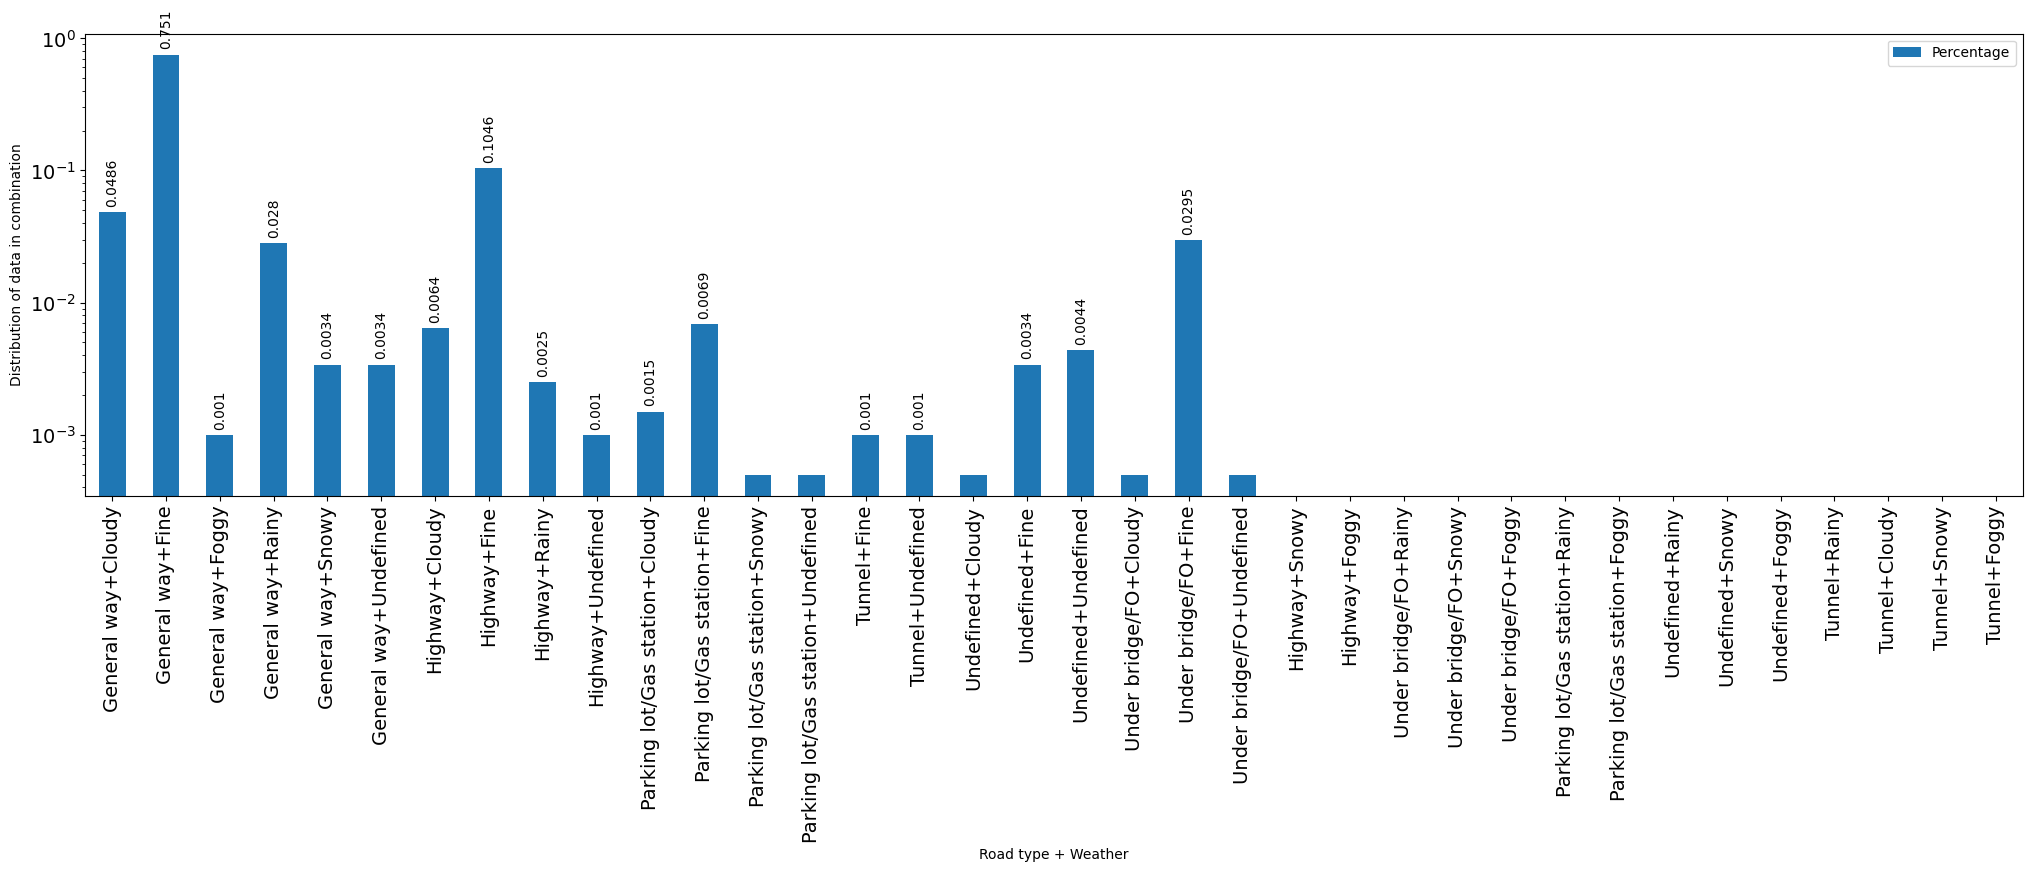

<Figure size 2500x600 with 0 Axes>

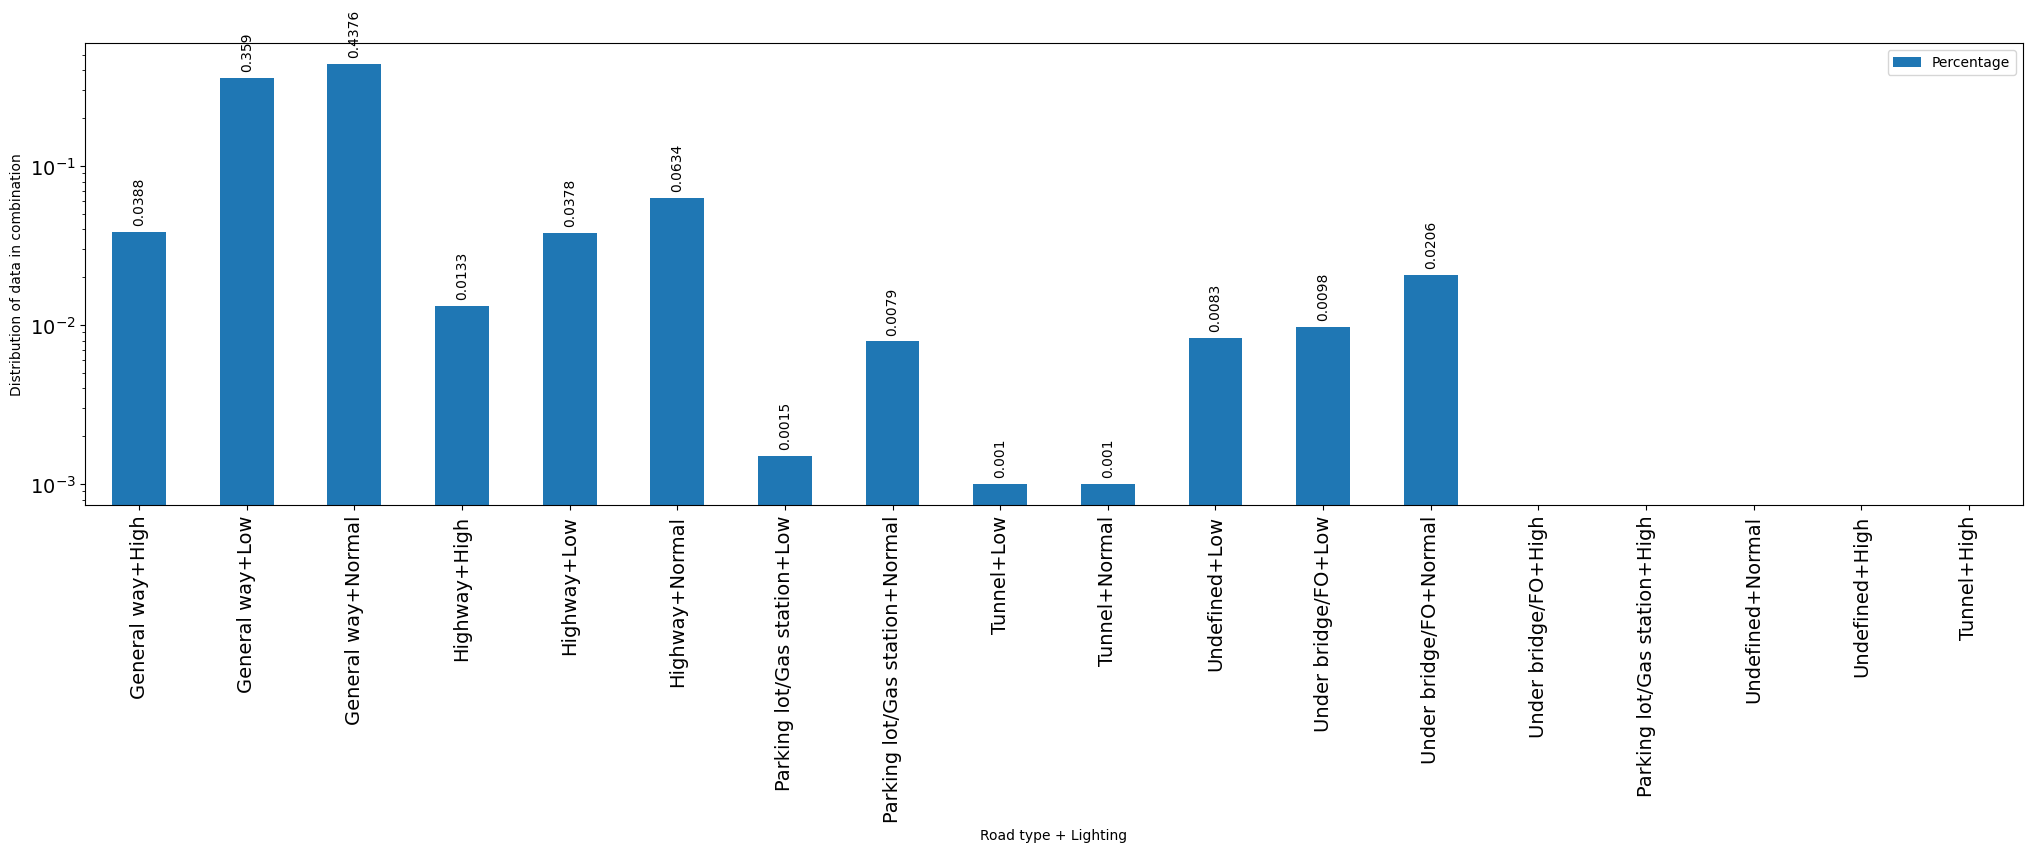

<Figure size 2500x600 with 0 Axes>

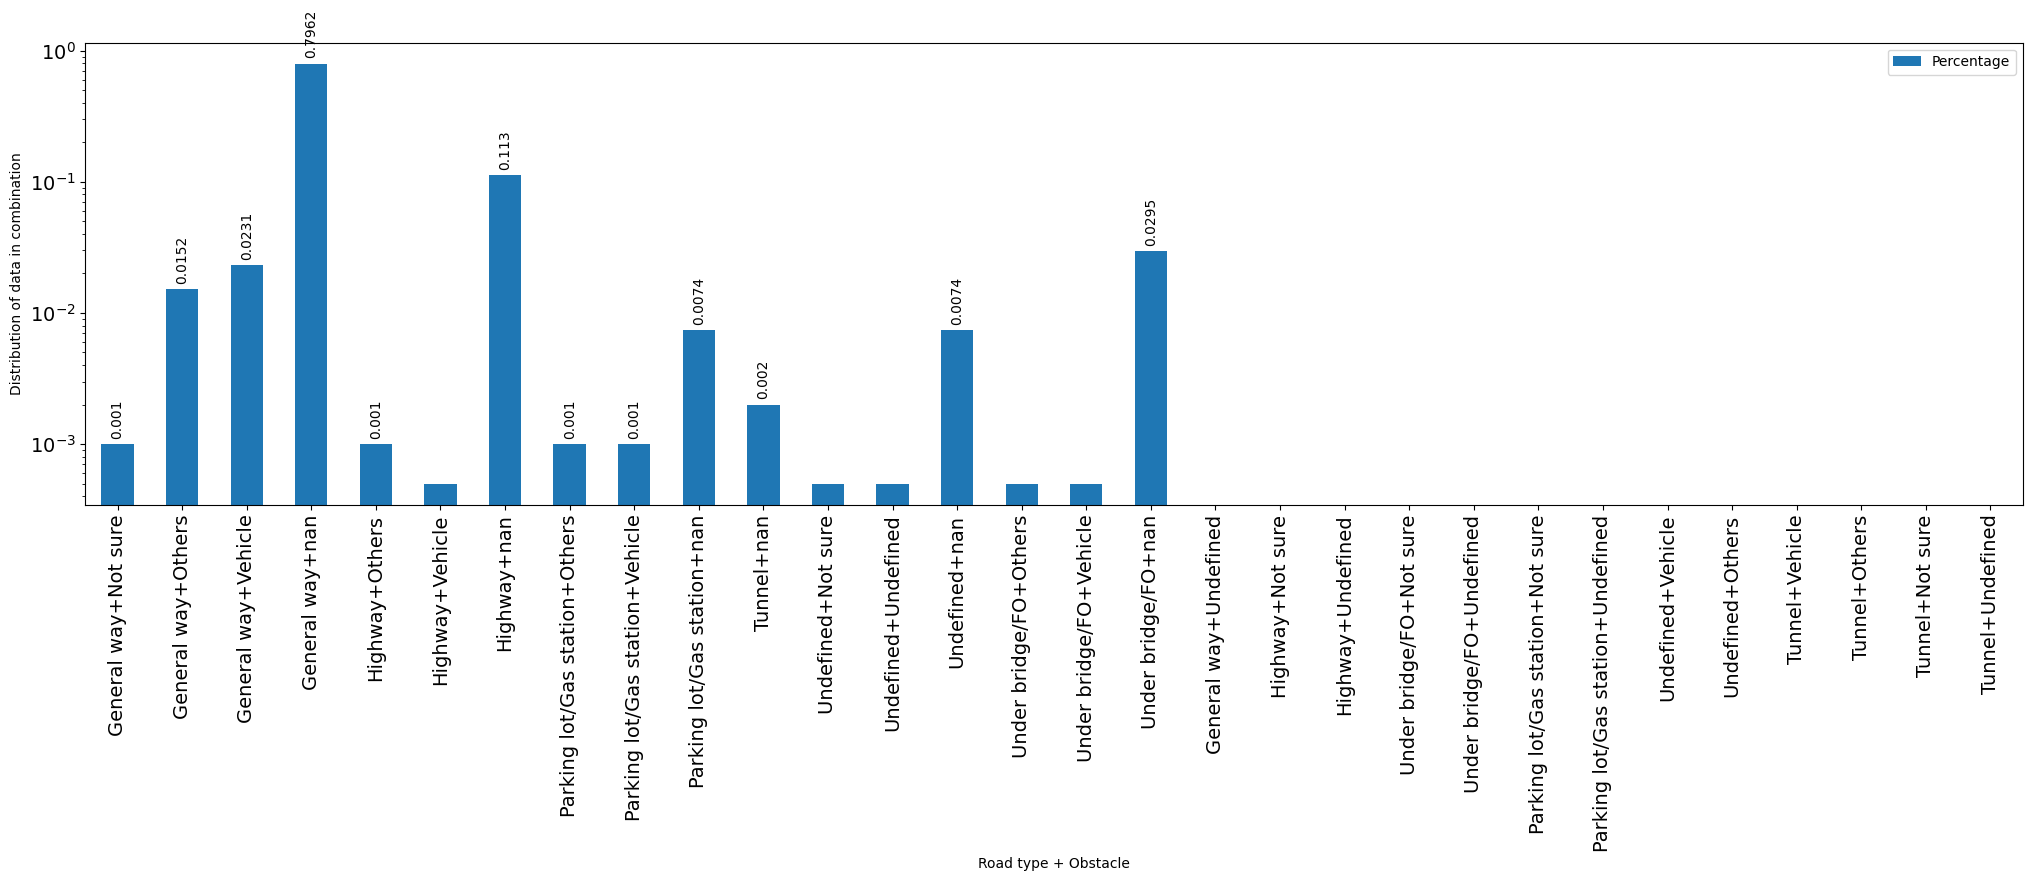

<Figure size 2500x600 with 0 Axes>

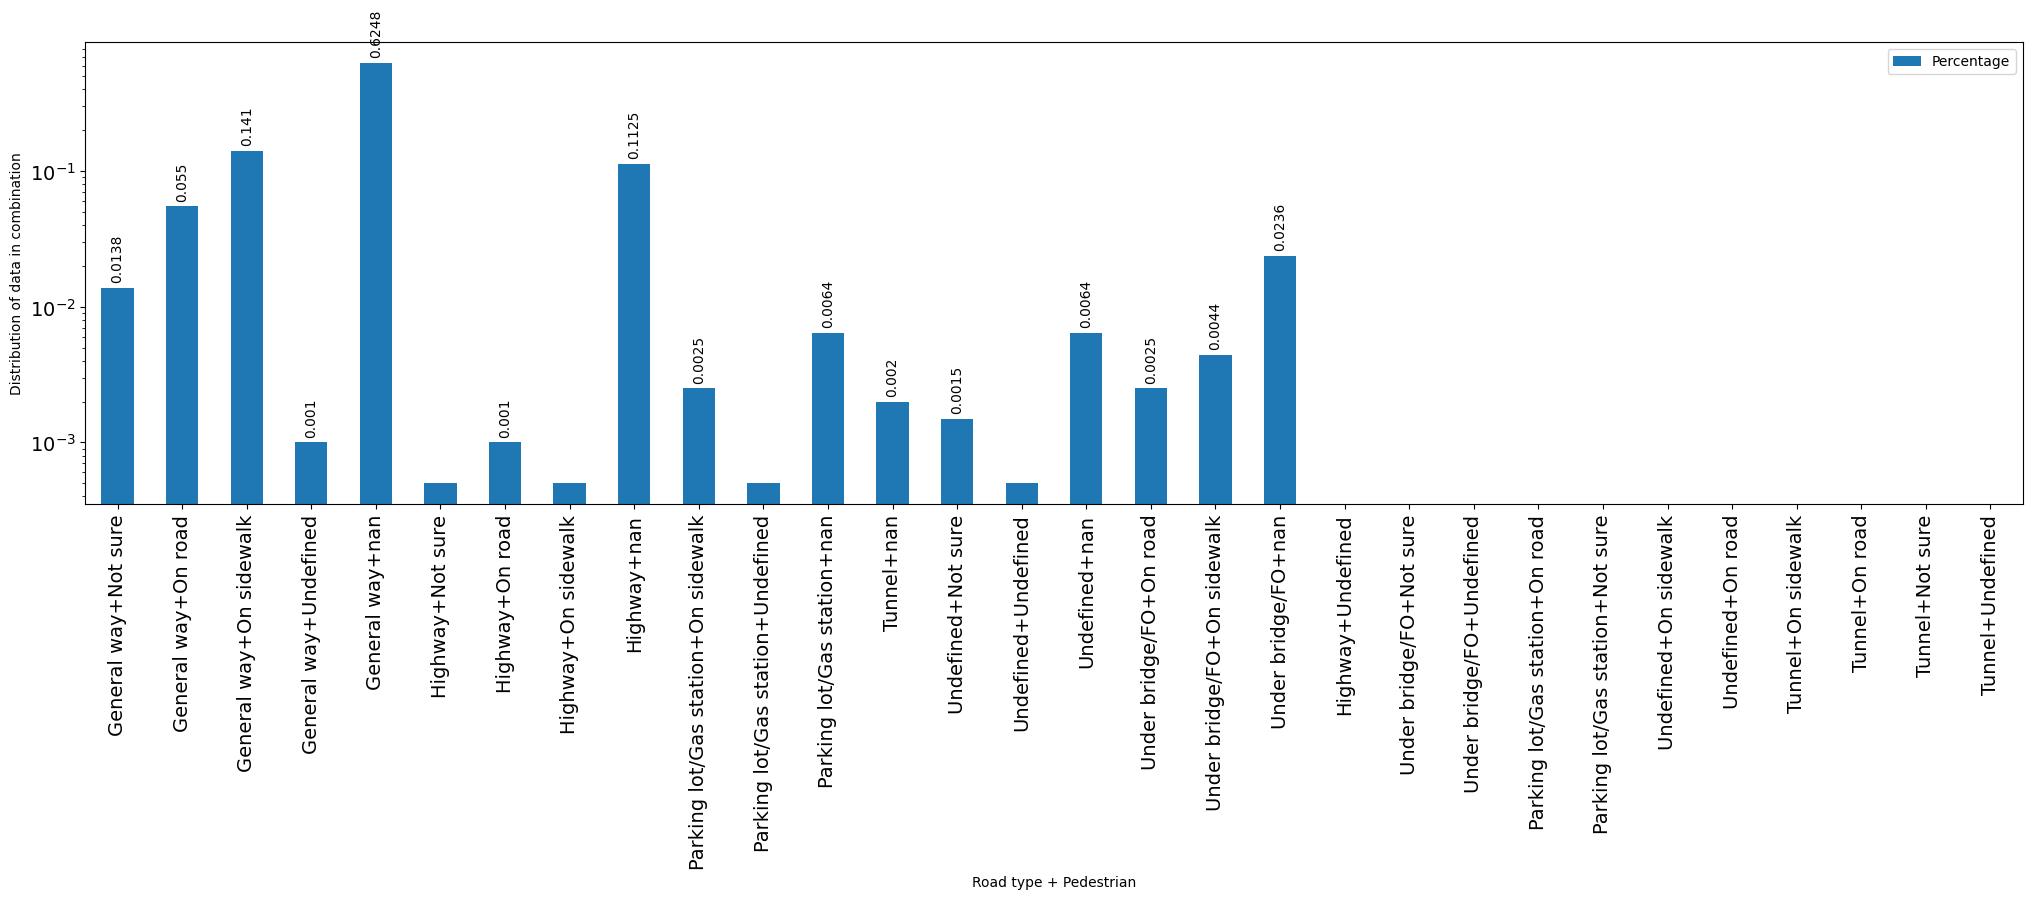

<Figure size 2500x600 with 0 Axes>

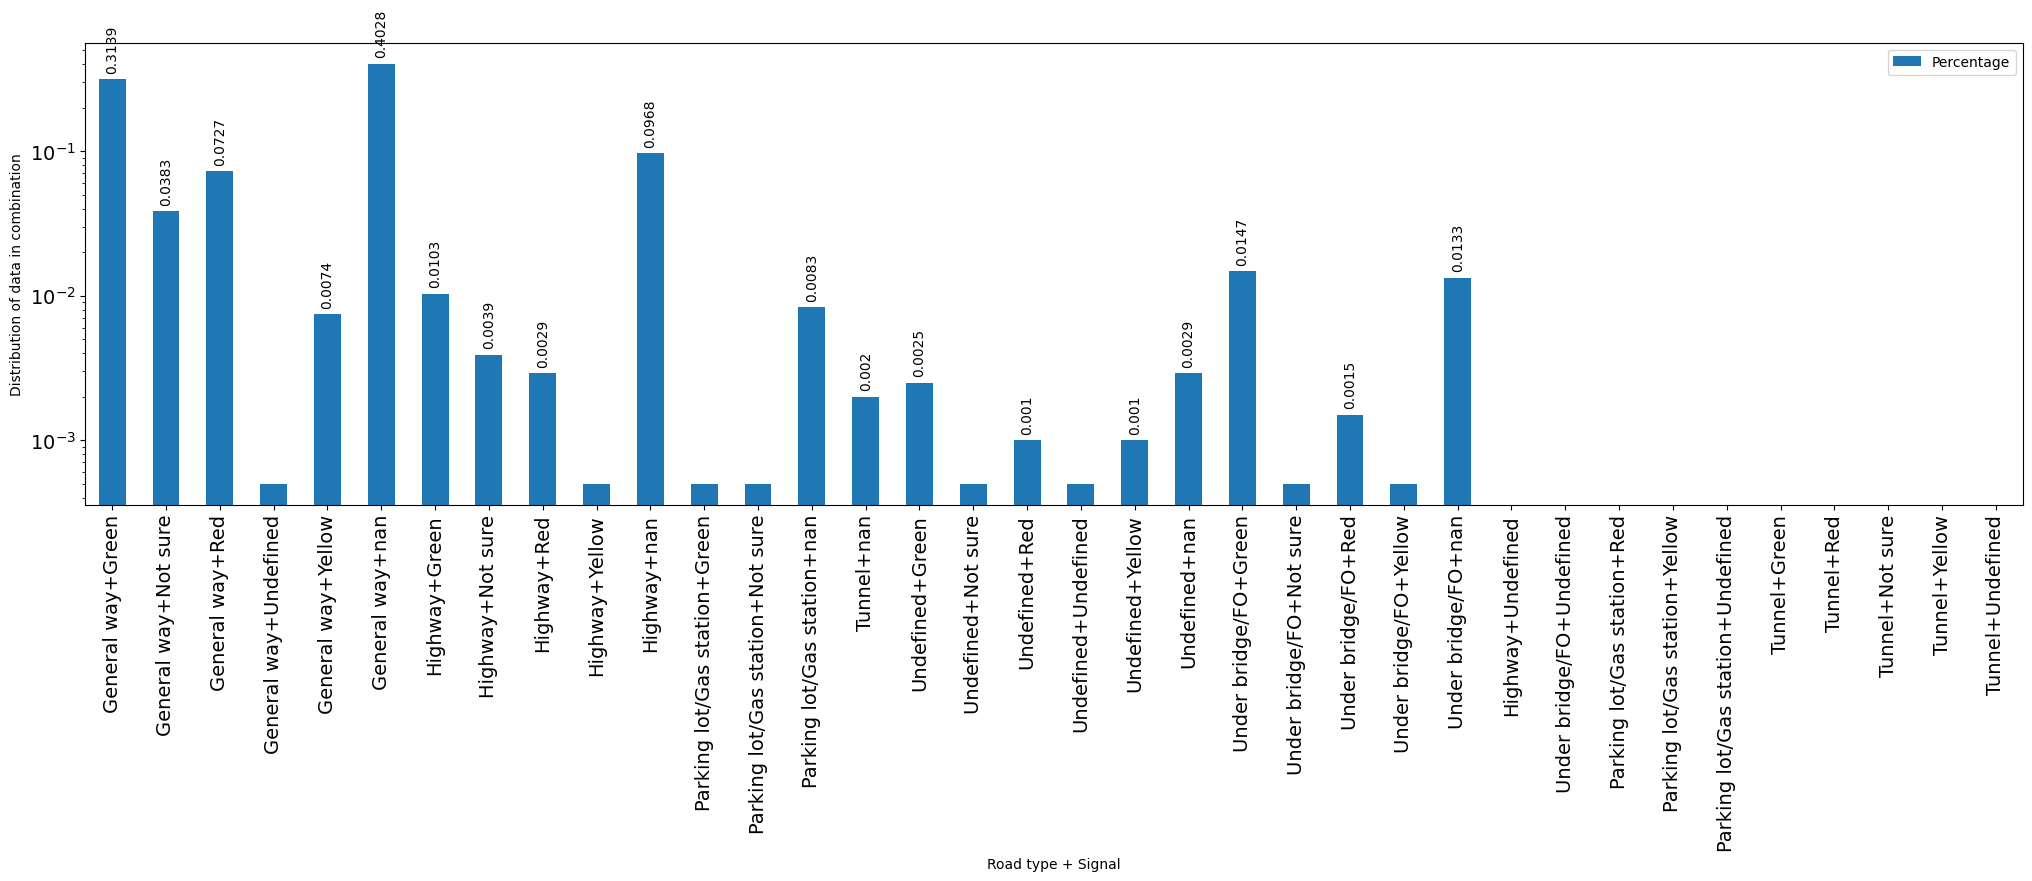

<Figure size 2500x600 with 0 Axes>

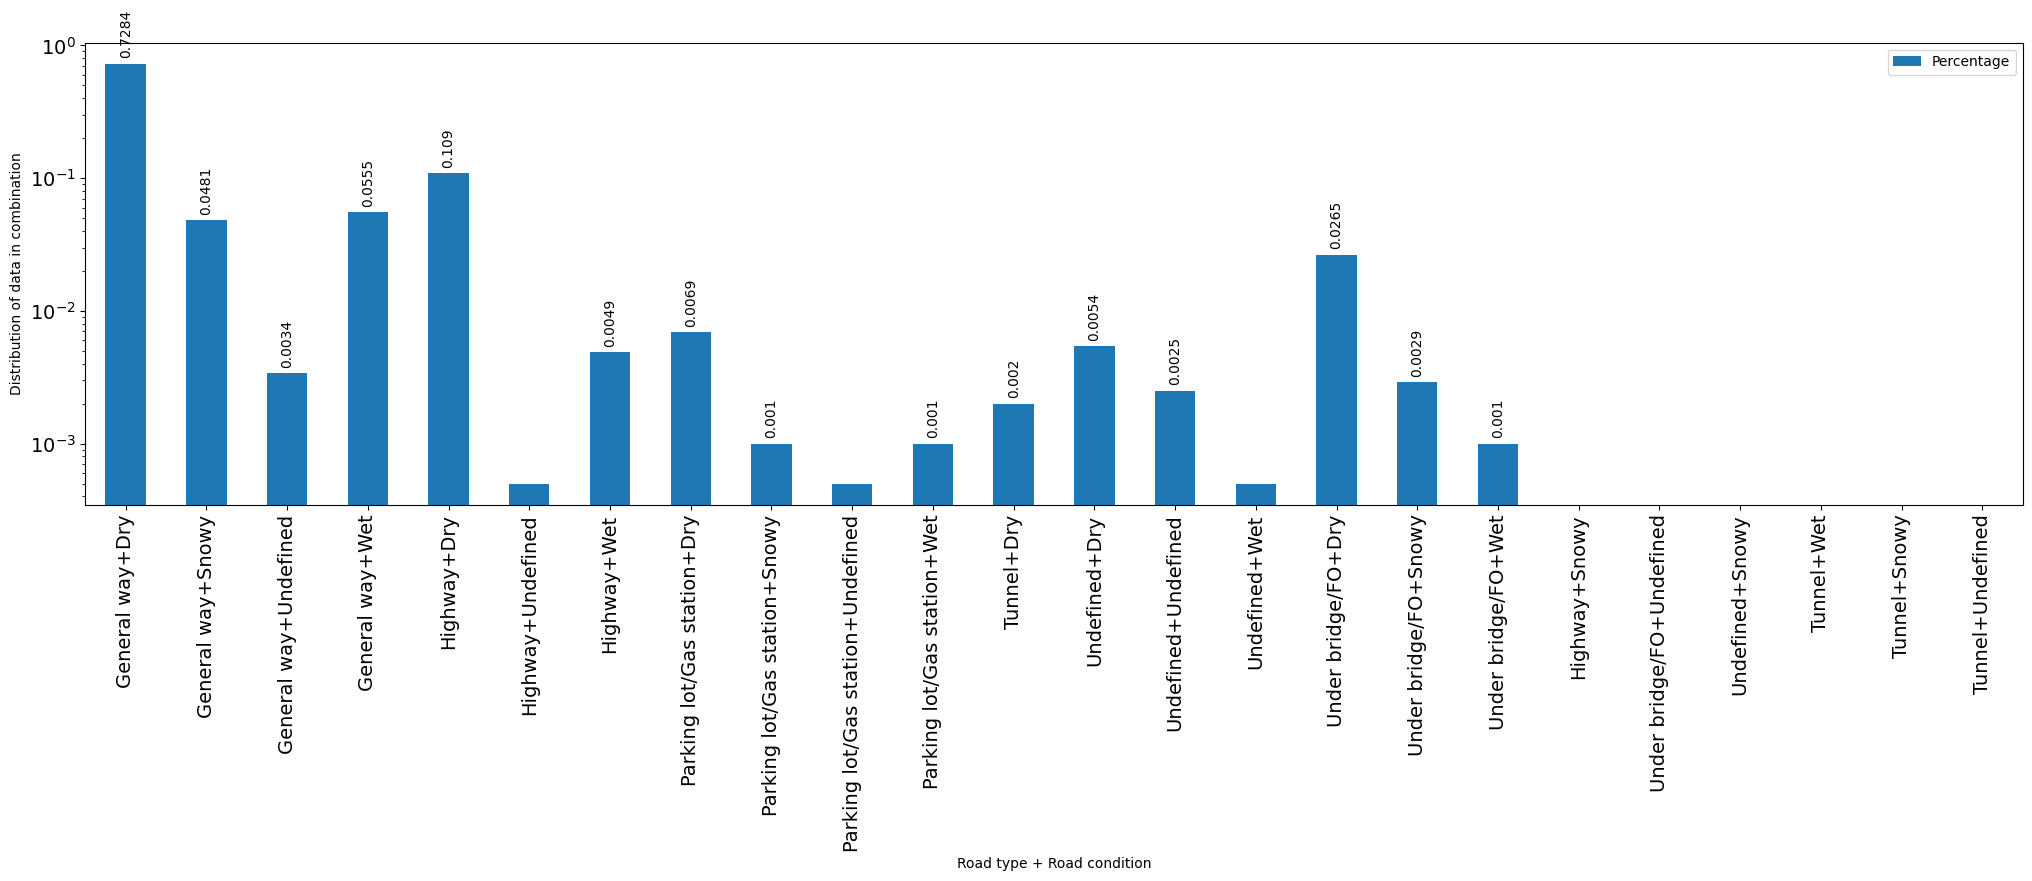

<Figure size 2500x600 with 0 Axes>

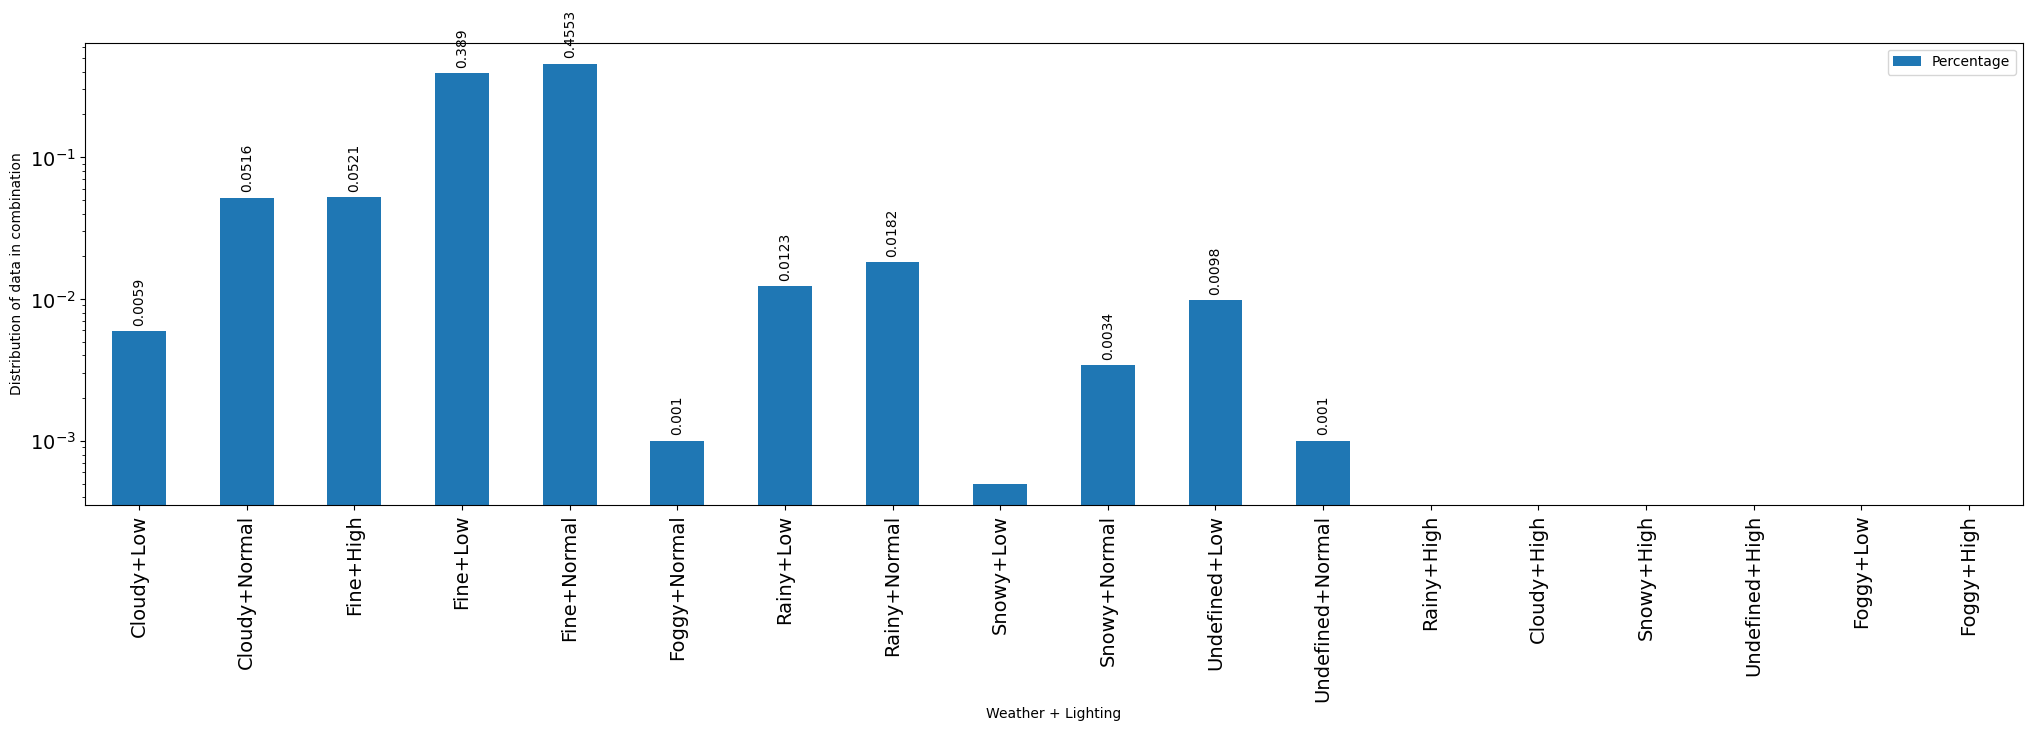

<Figure size 2500x600 with 0 Axes>

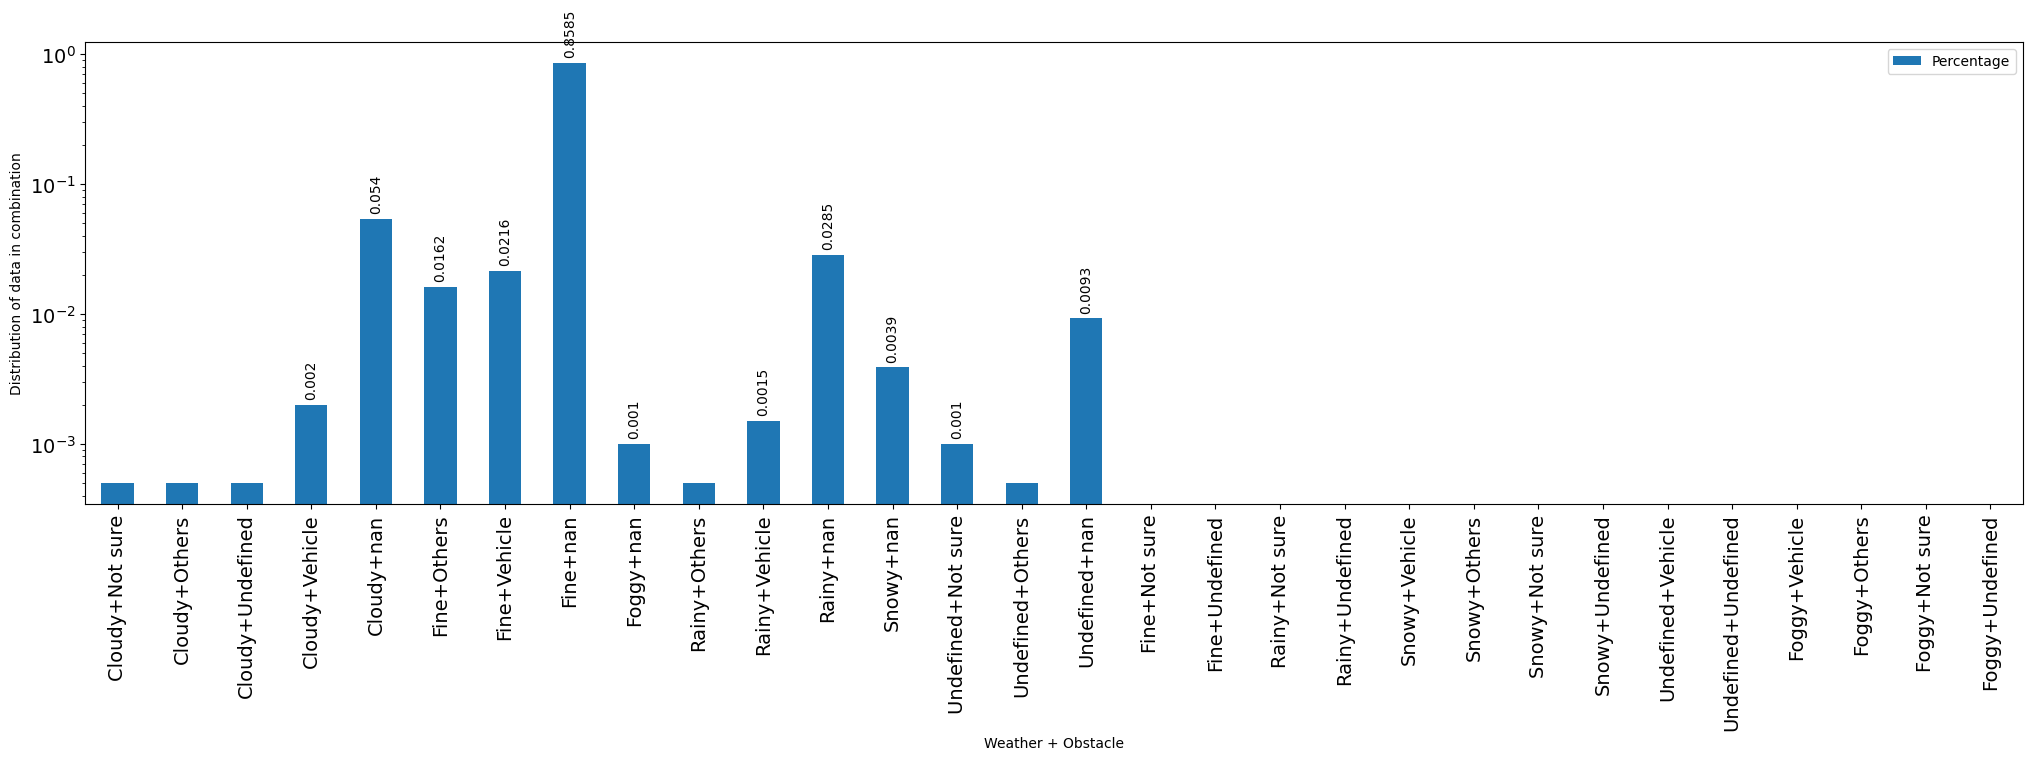

<Figure size 2500x600 with 0 Axes>

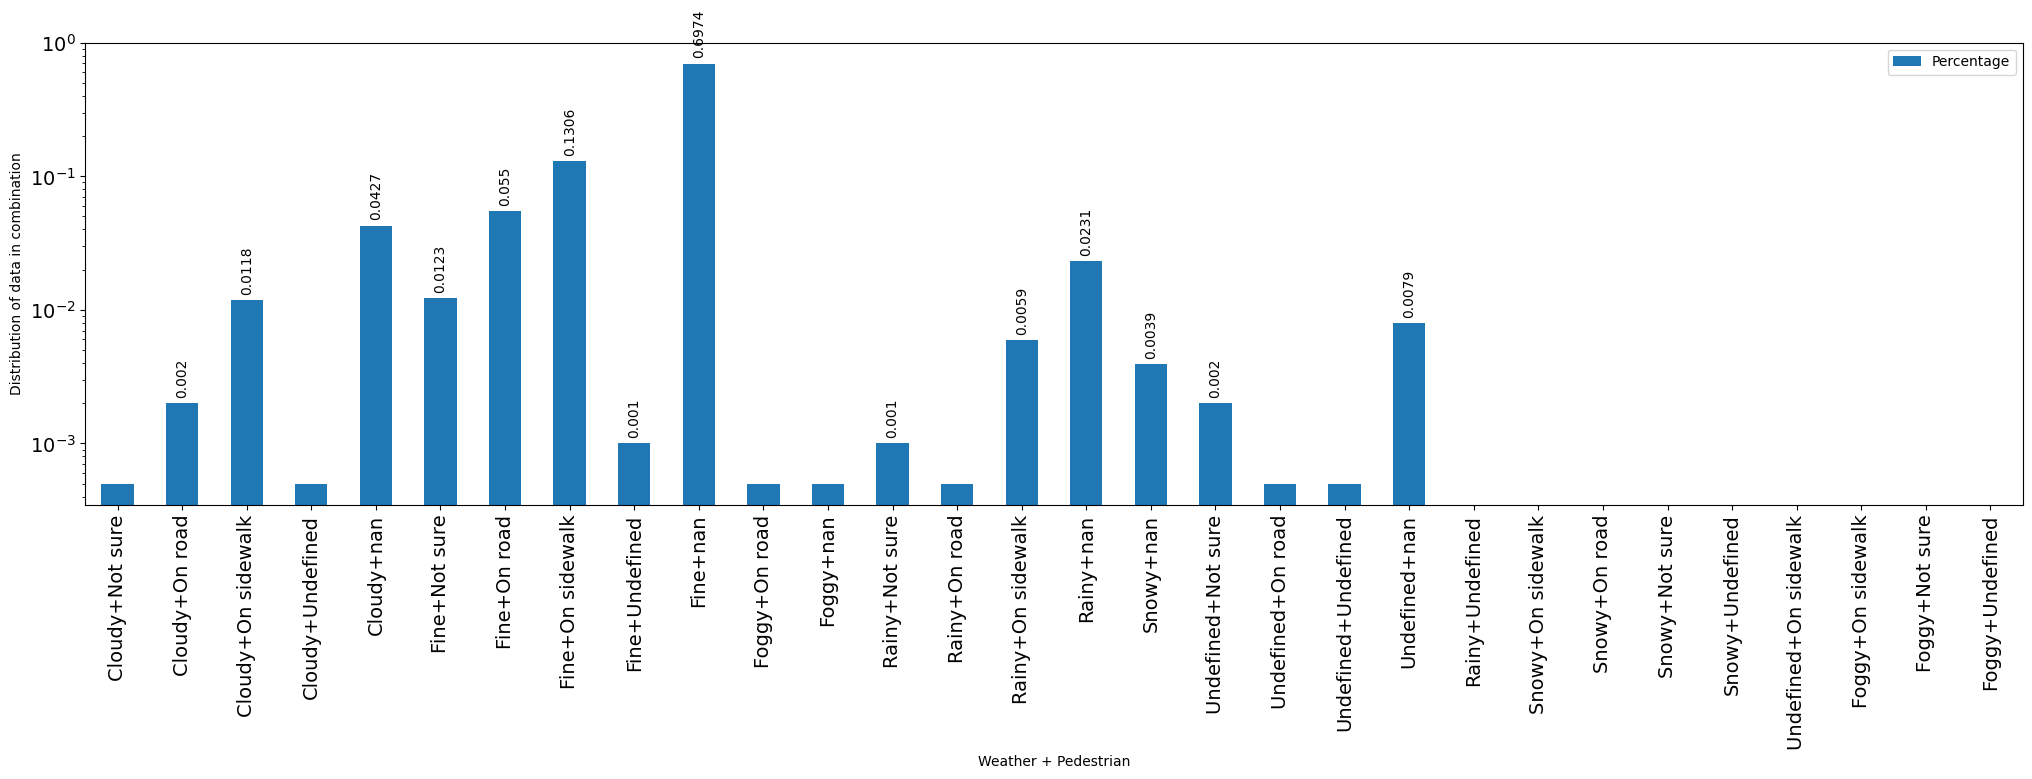

<Figure size 2500x600 with 0 Axes>

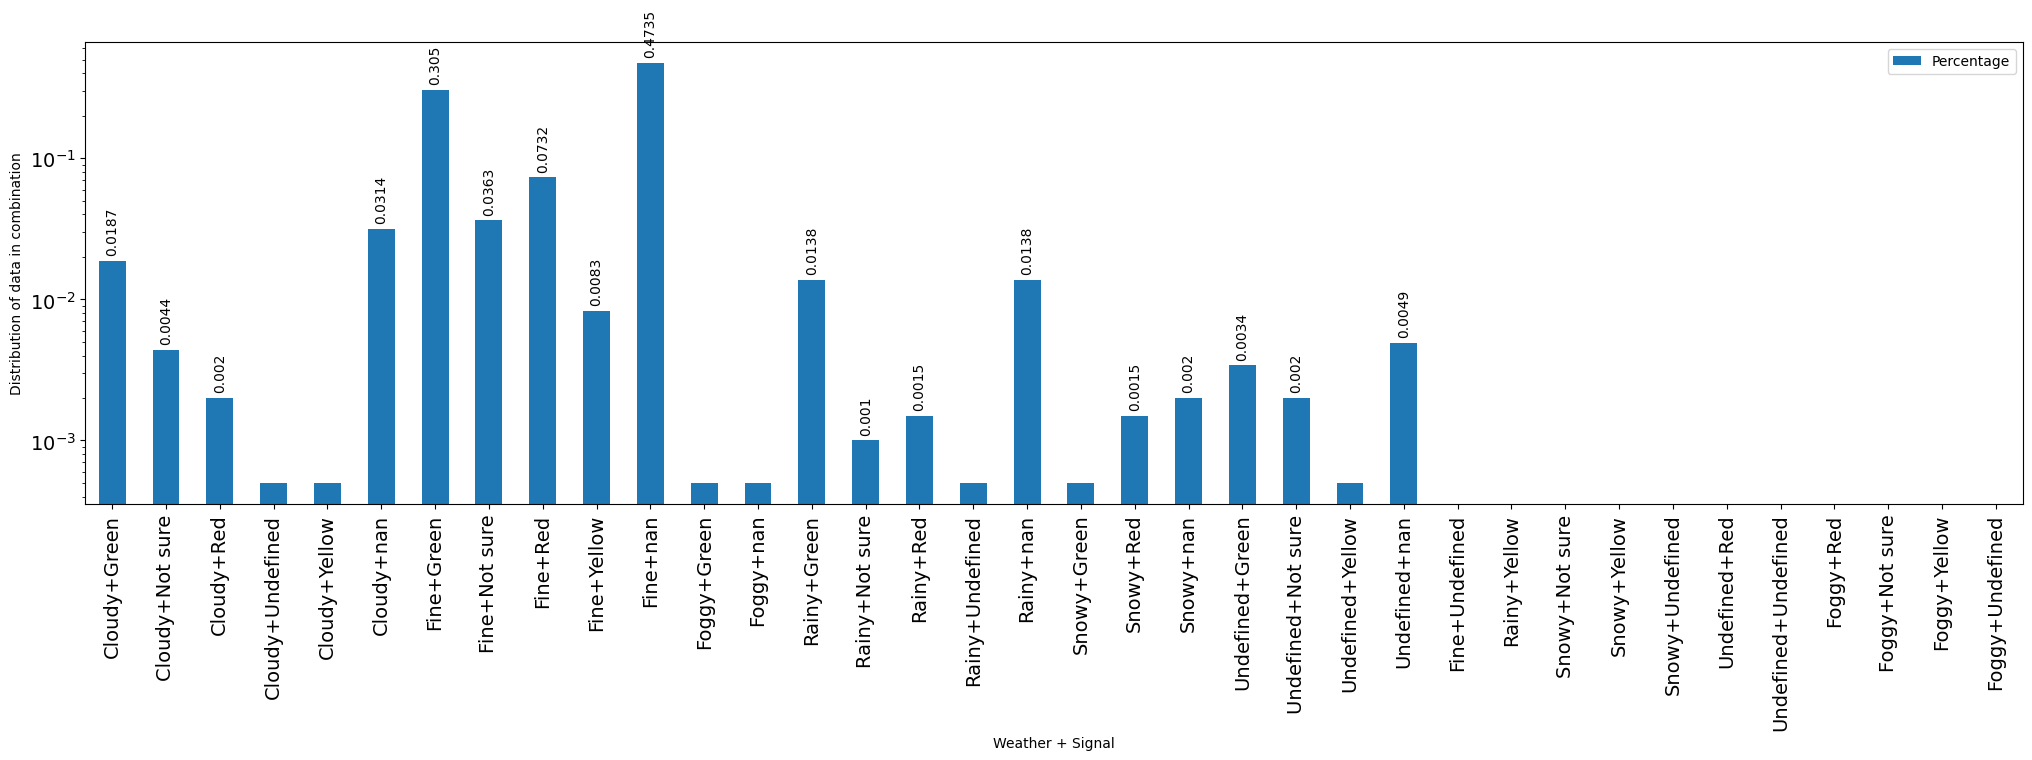

<Figure size 2500x600 with 0 Axes>

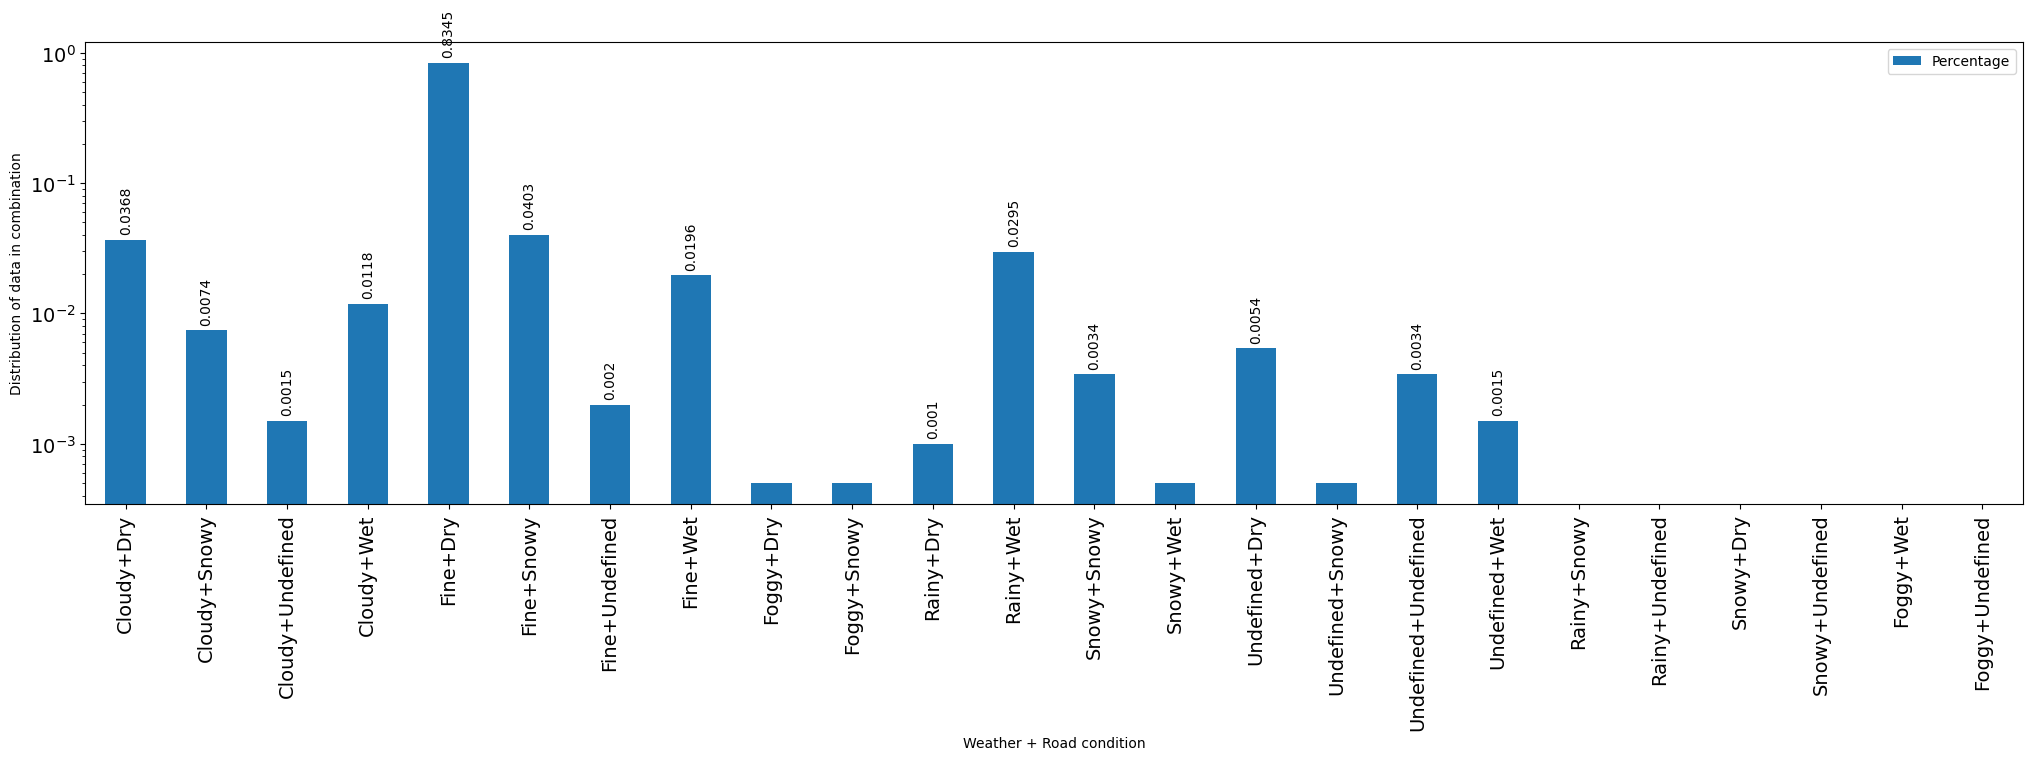

<Figure size 2500x600 with 0 Axes>

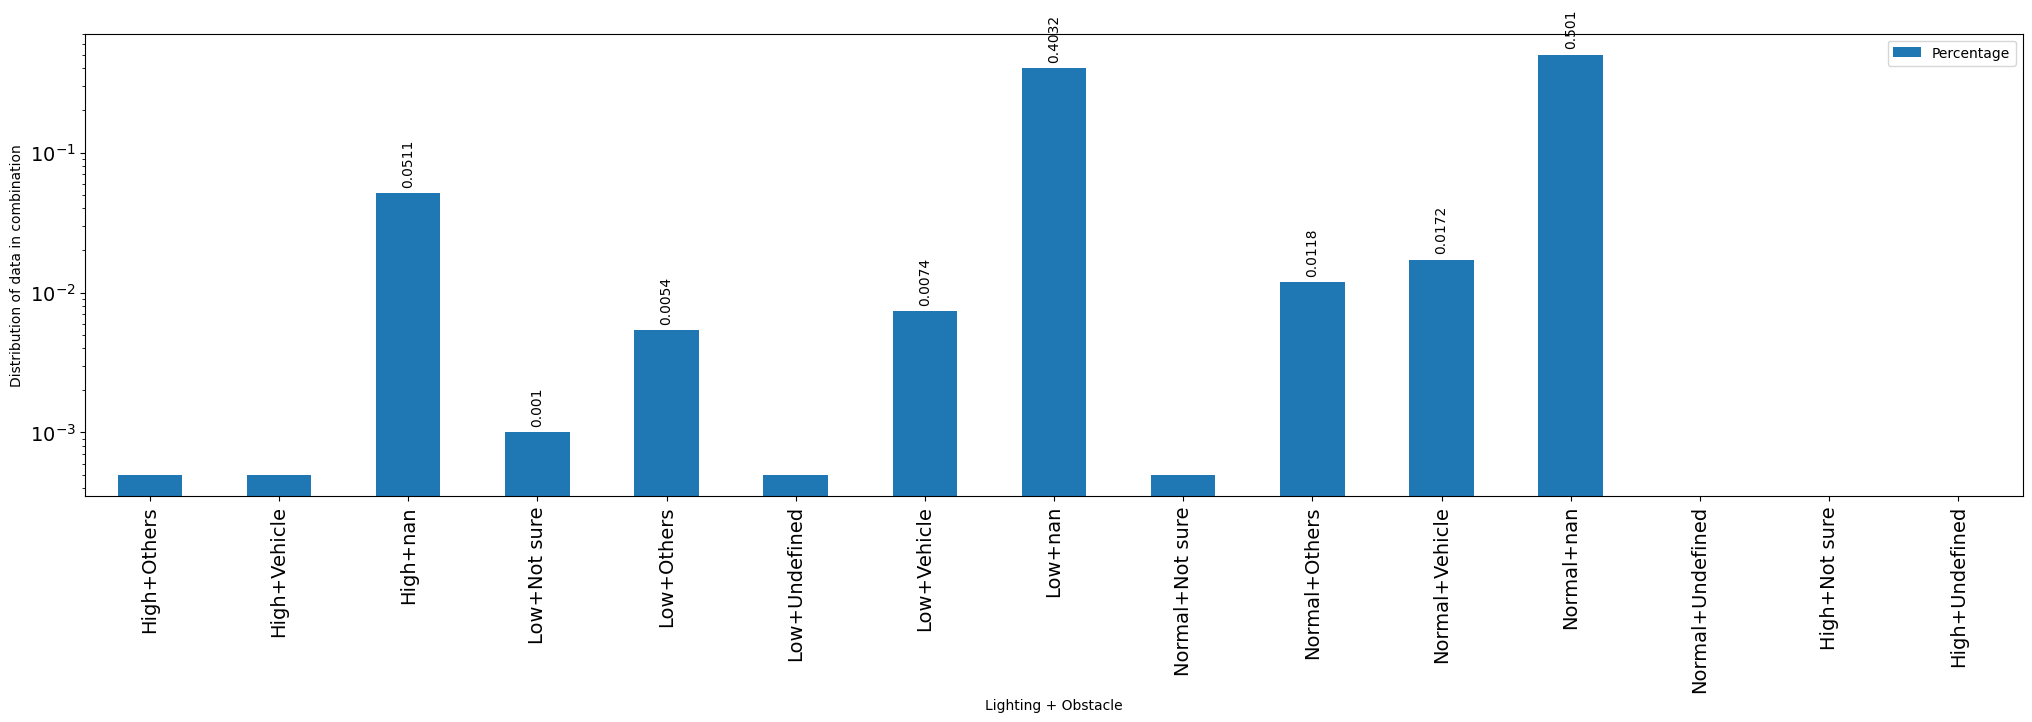

<Figure size 2500x600 with 0 Axes>

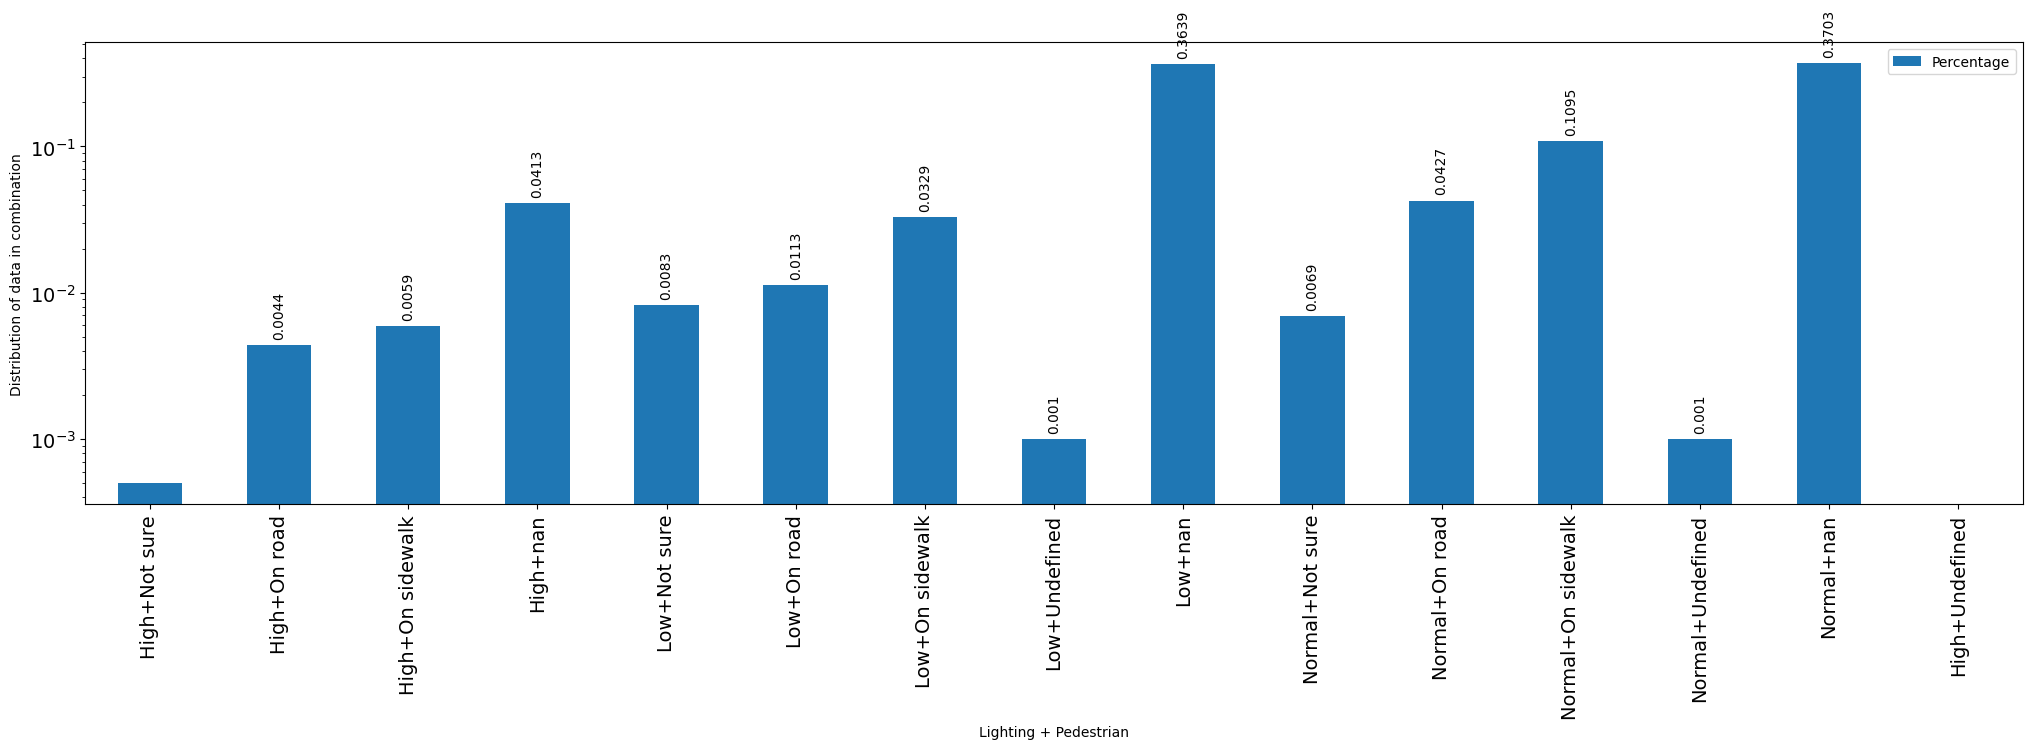

<Figure size 2500x600 with 0 Axes>

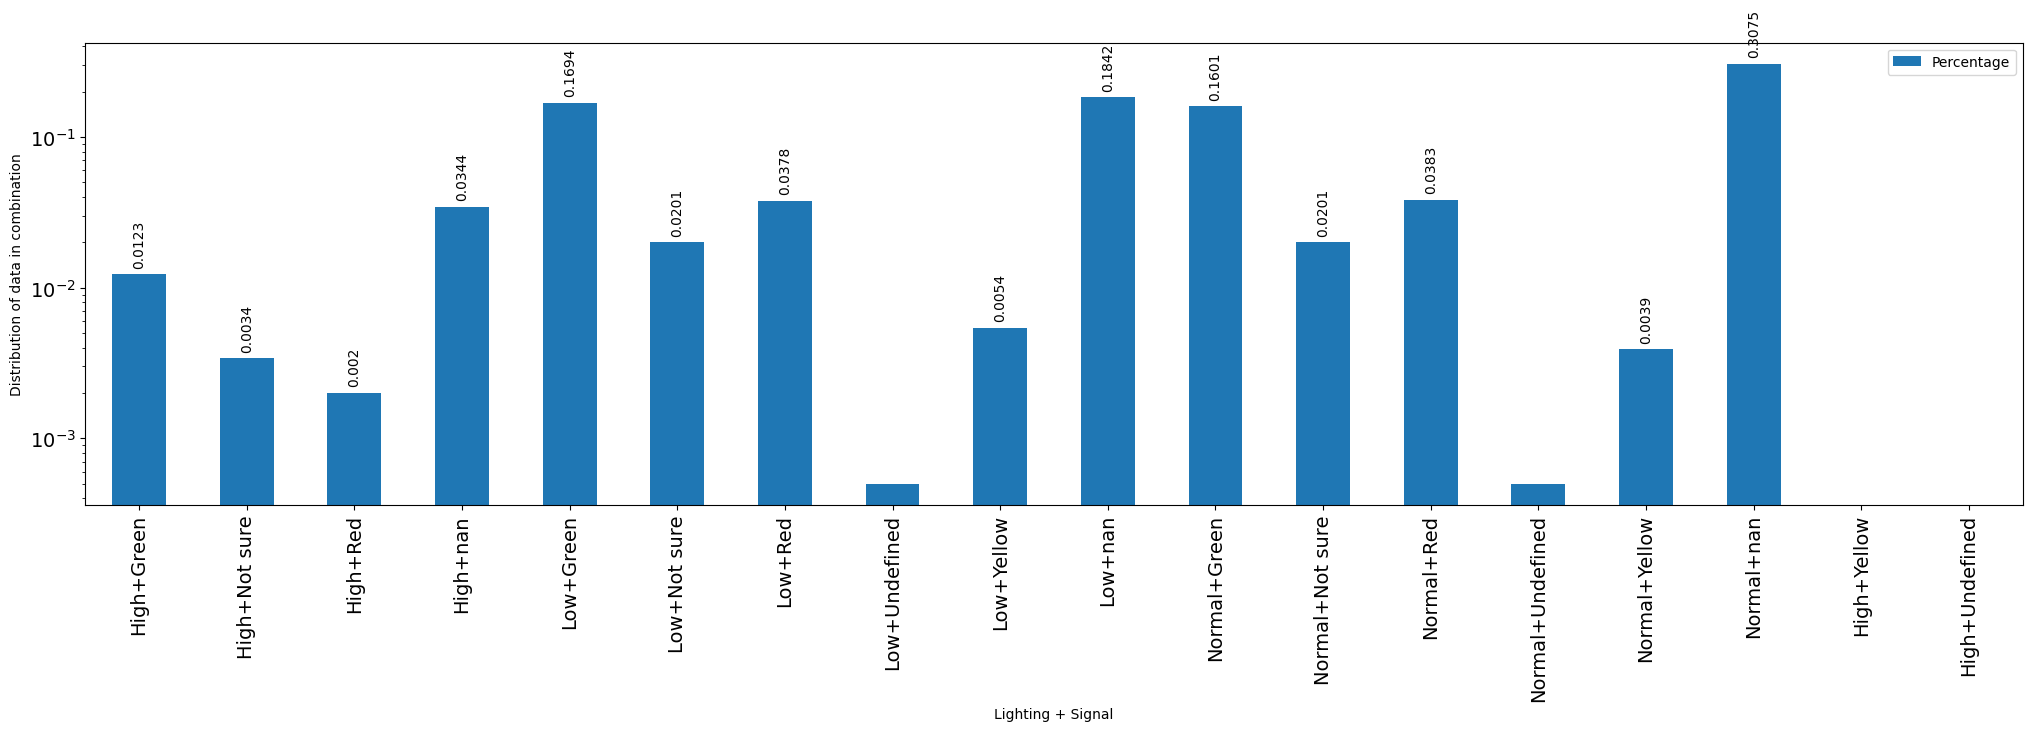

<Figure size 2500x600 with 0 Axes>

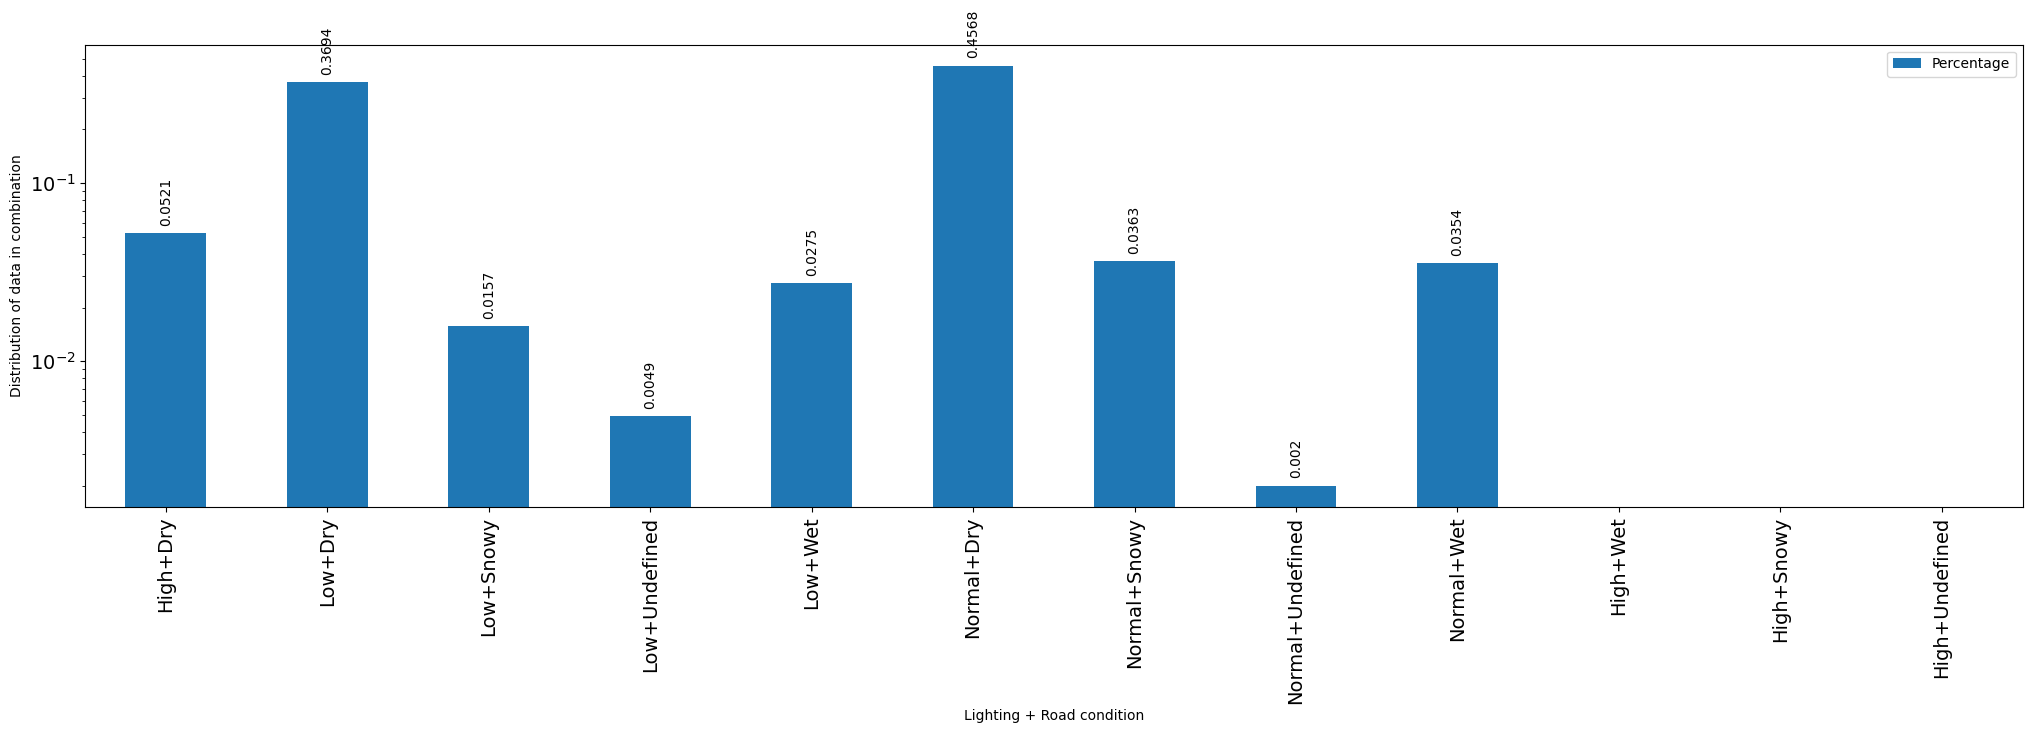

<Figure size 2500x600 with 0 Axes>

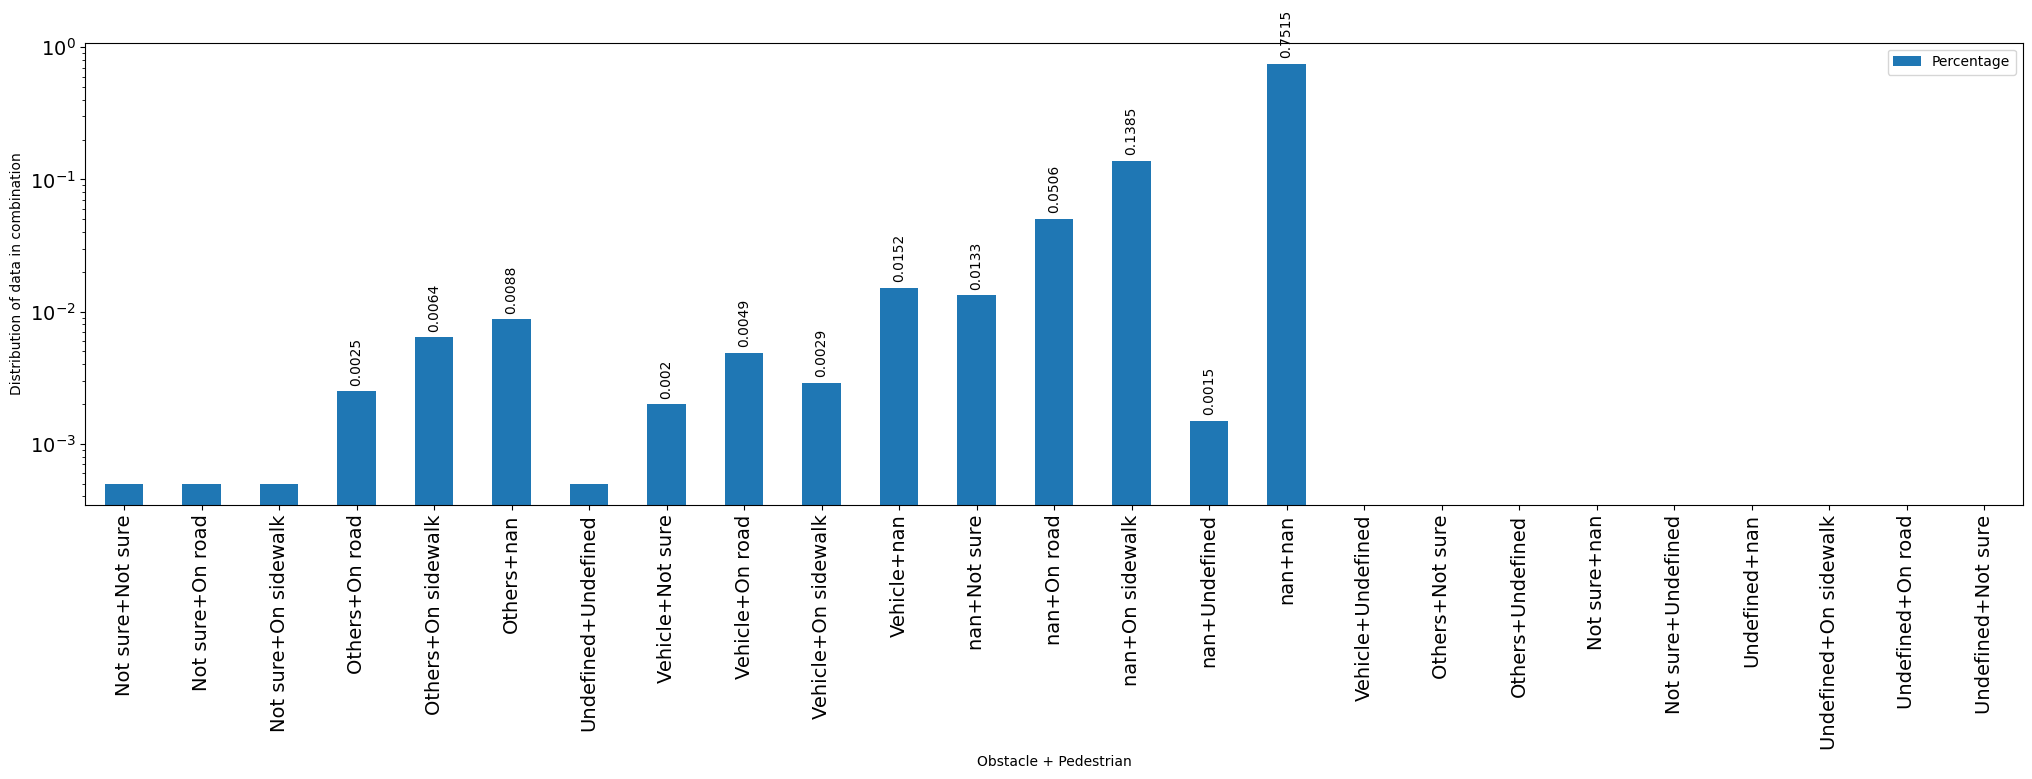

<Figure size 2500x600 with 0 Axes>

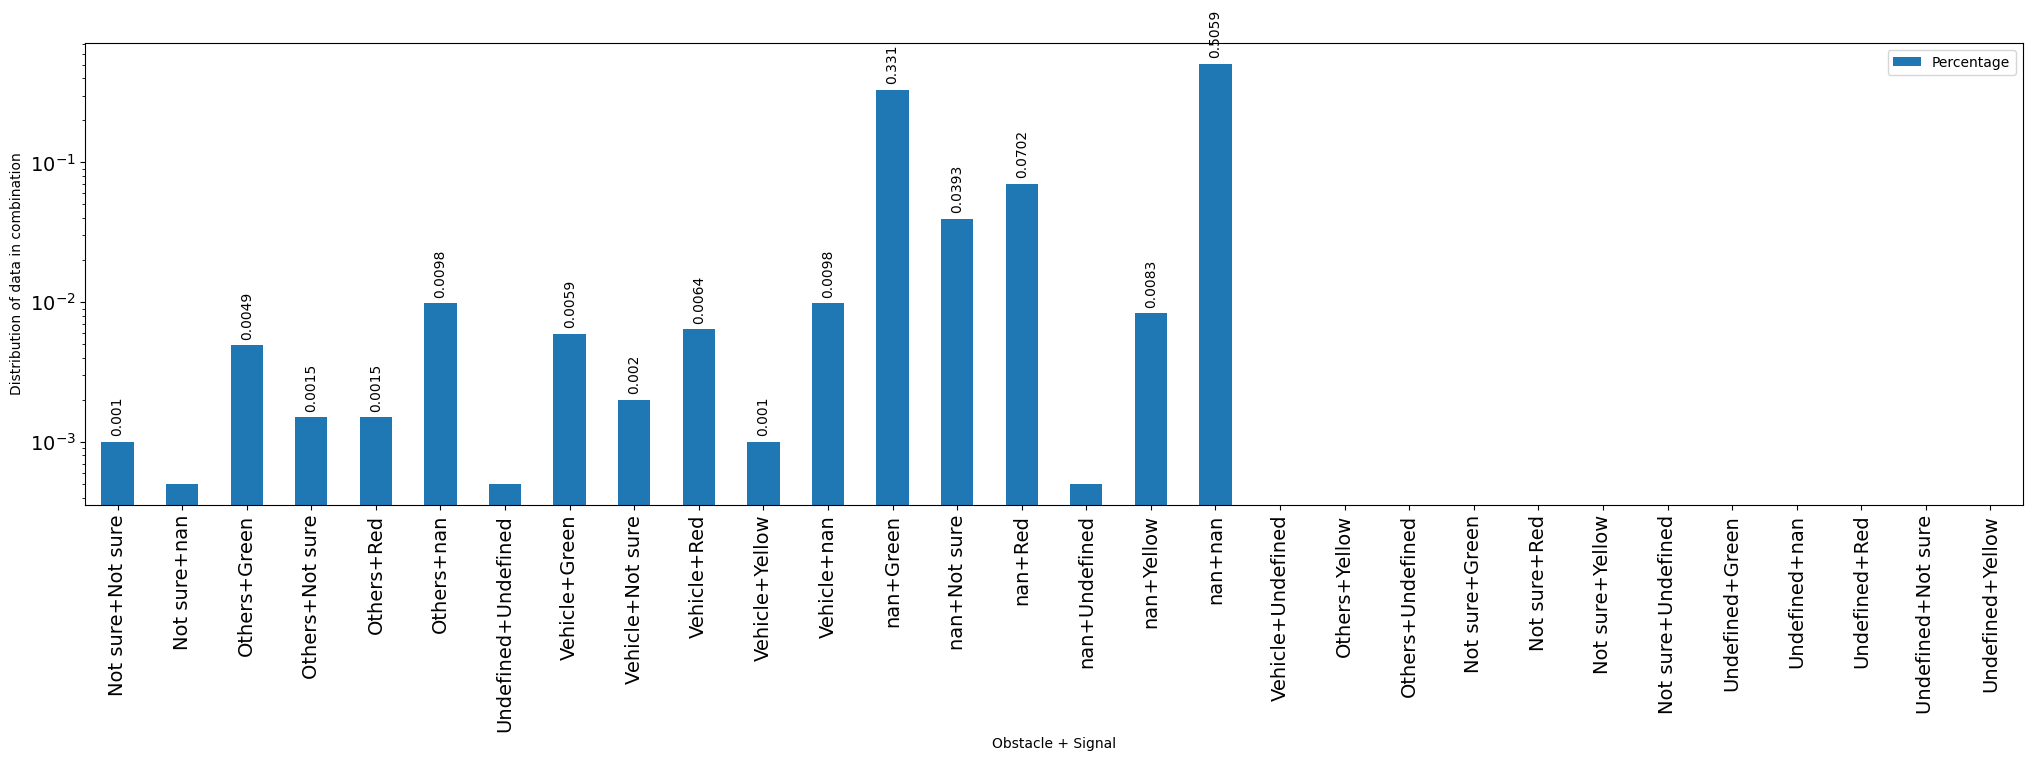

<Figure size 2500x600 with 0 Axes>

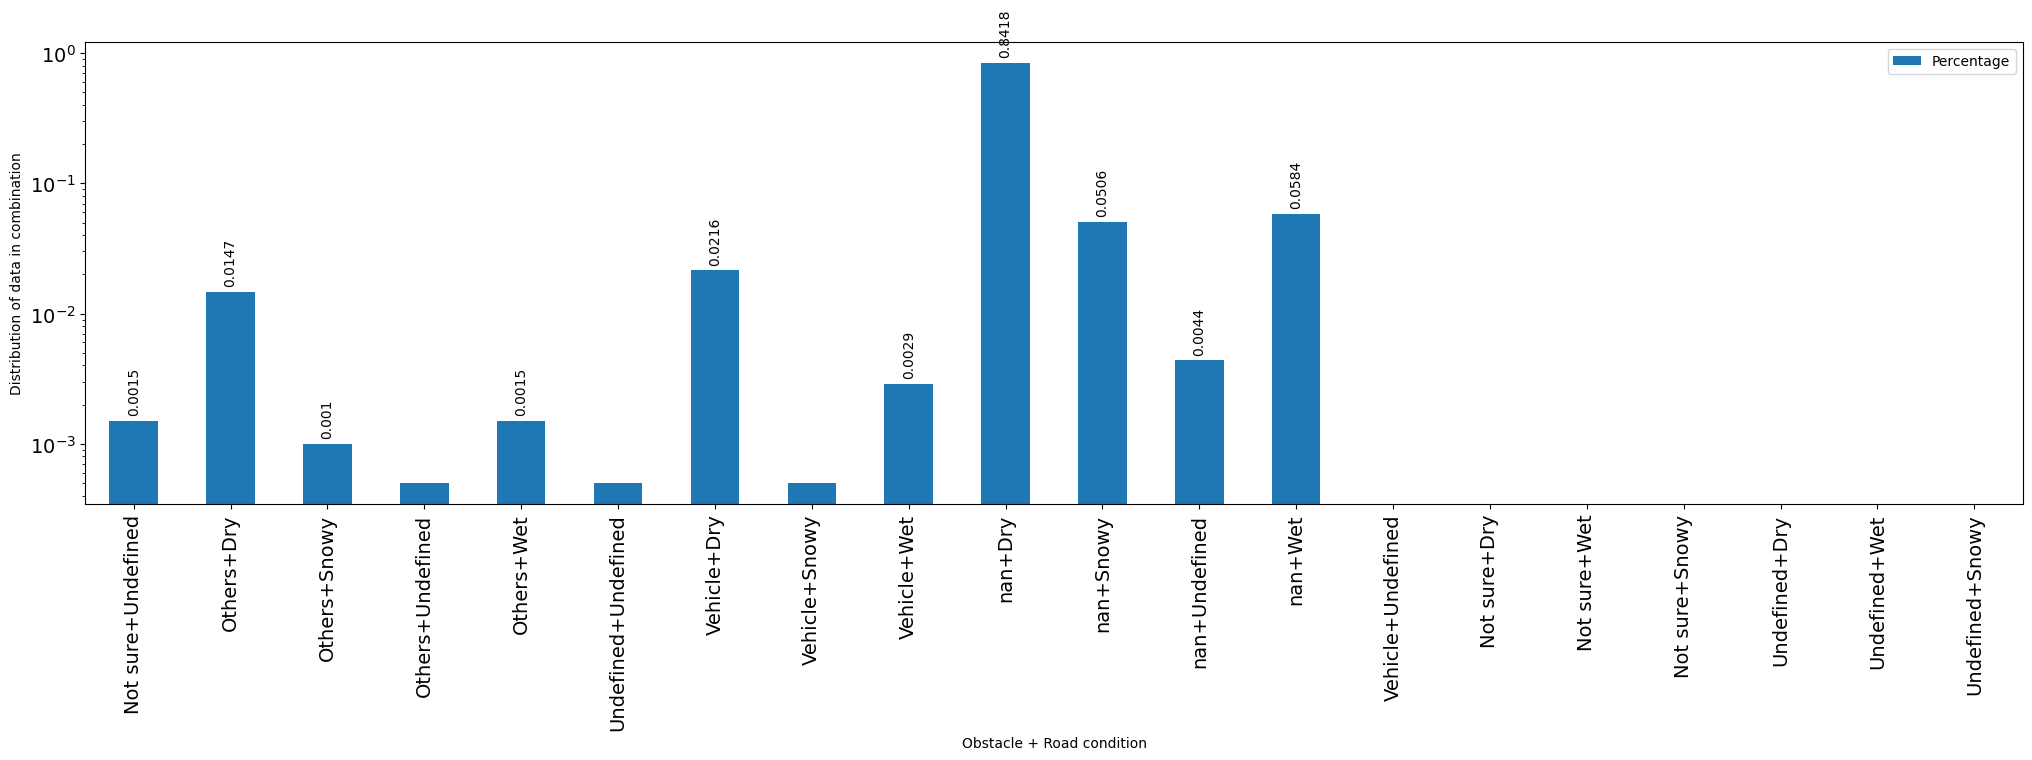

<Figure size 2500x600 with 0 Axes>

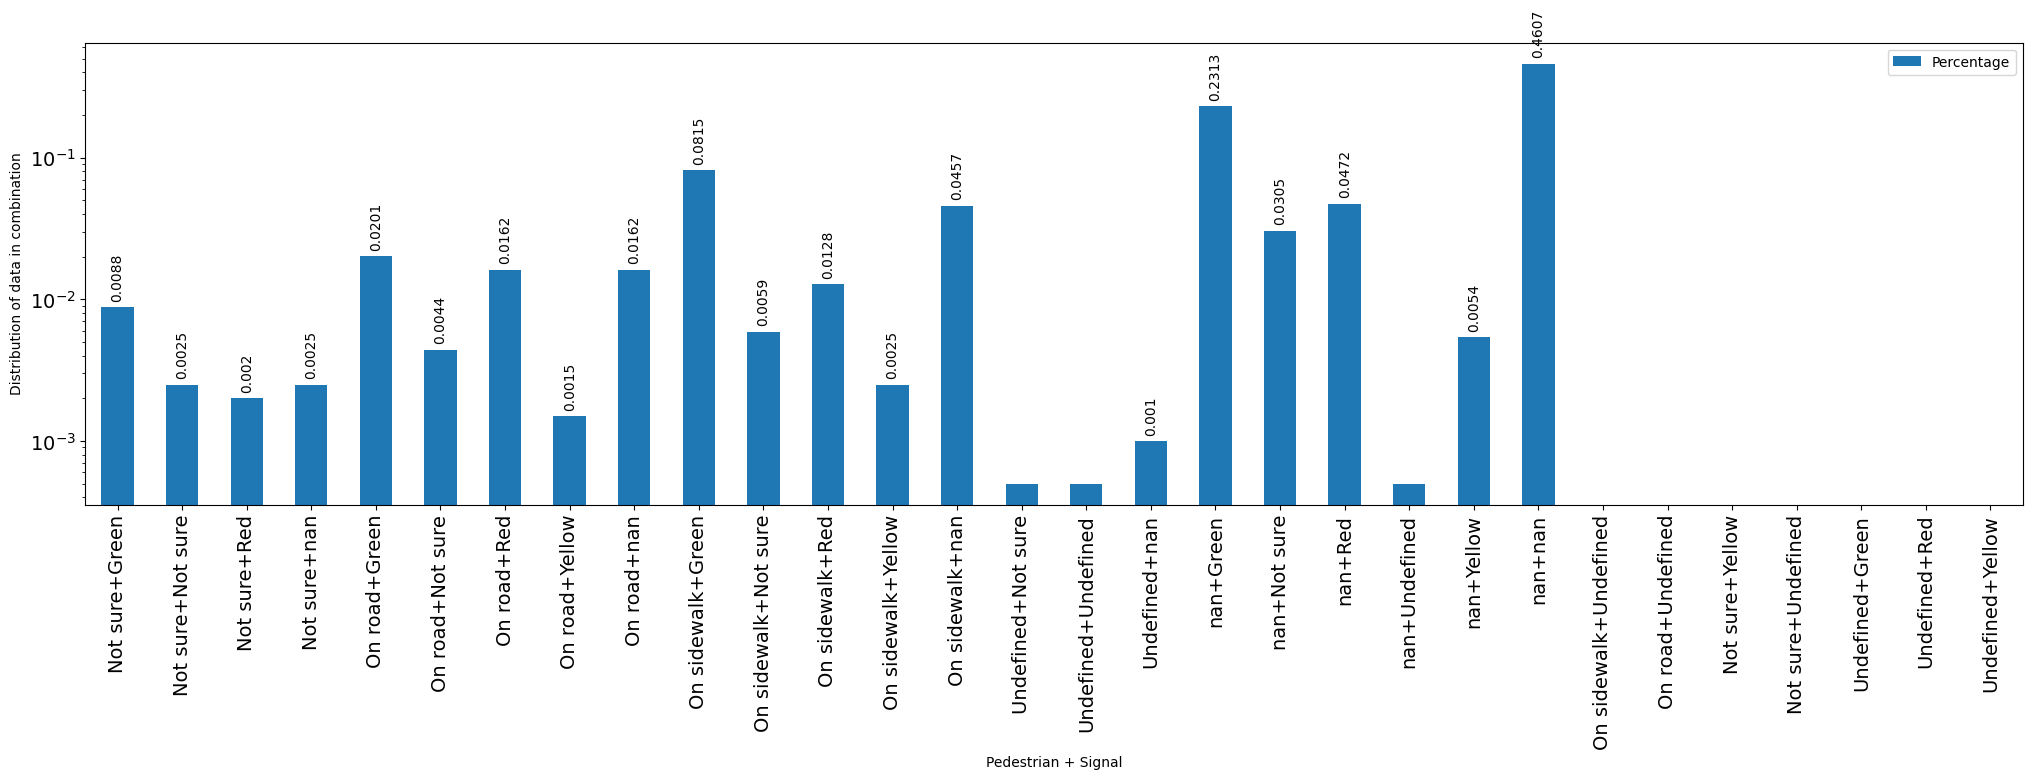

<Figure size 2500x600 with 0 Axes>

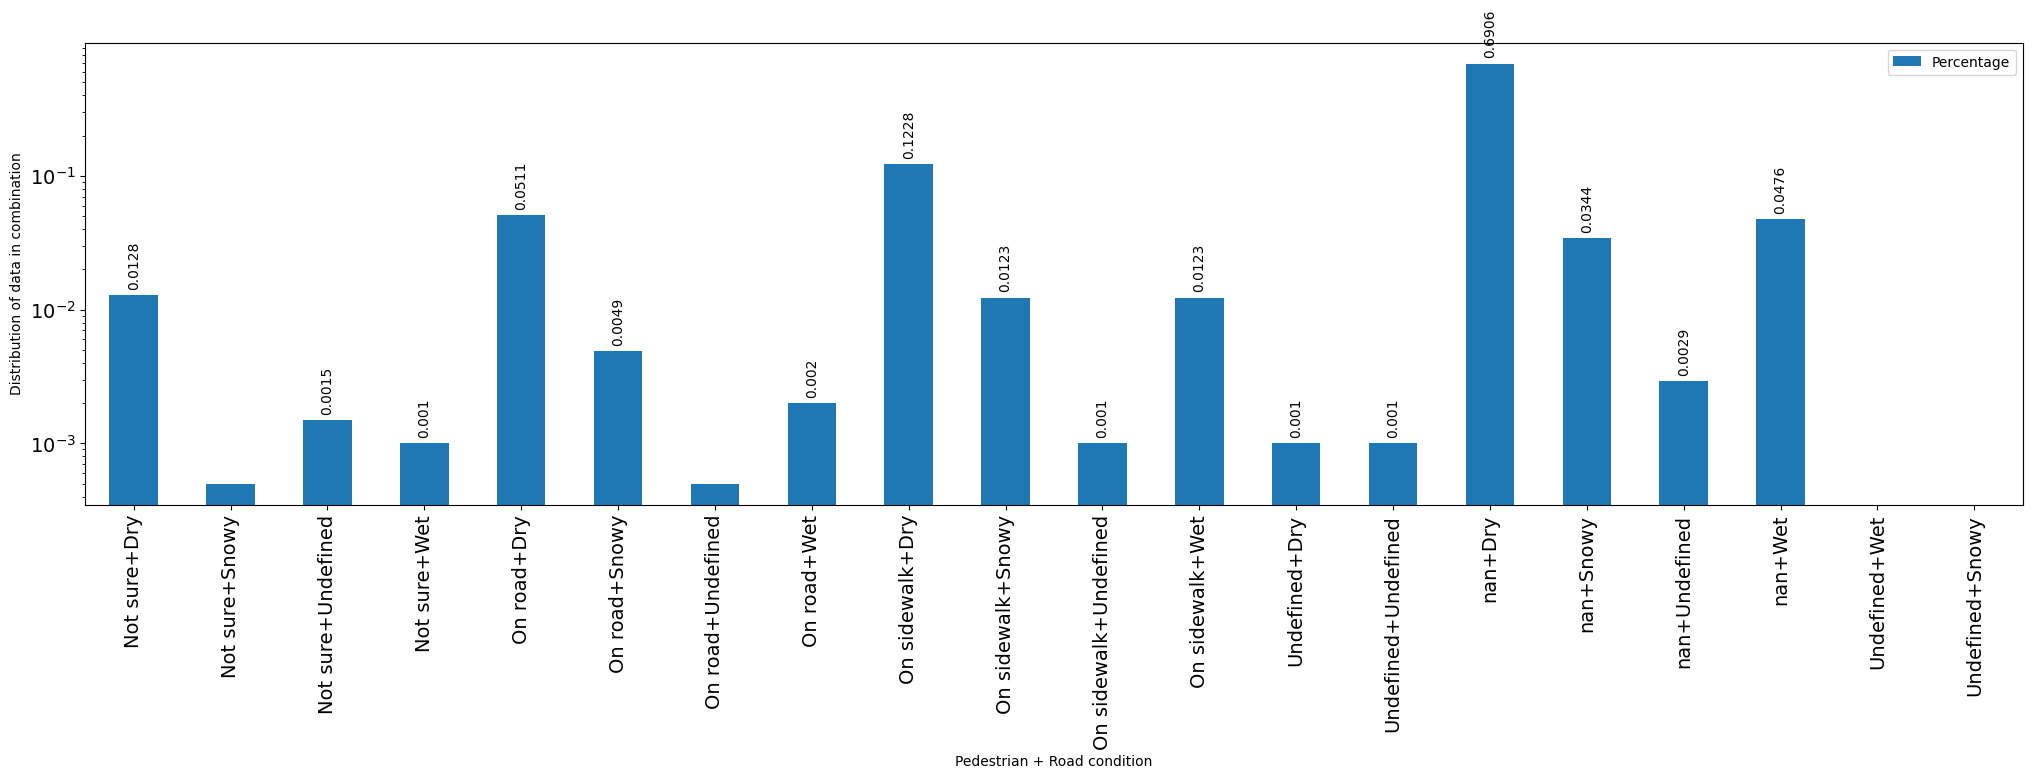

<Figure size 2500x600 with 0 Axes>

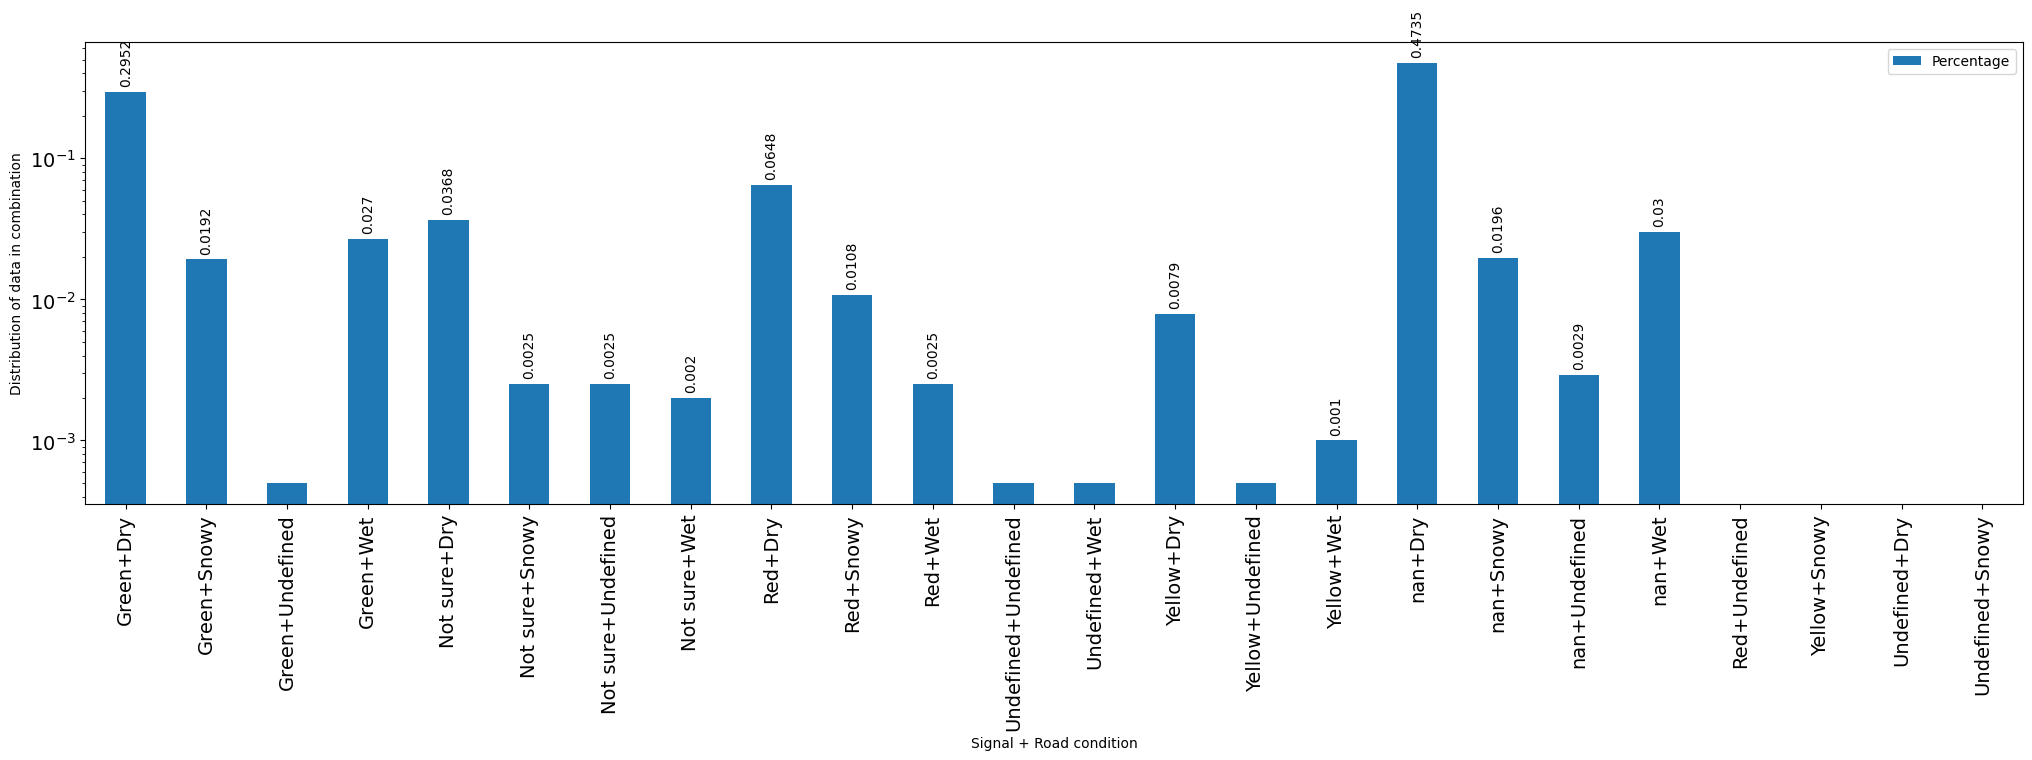

In [11]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [12]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [13]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
